# Beat The Bookies: Predicting EPL Matches
_Team C_

__Mohammad Ali Syed, Abdul Al-Fahim, Dylan Hoi, Henry Chen, Chris Wong & Yolanne Lee__

**Contents:**

- [Section 1](#section1): Introduction

- [Section 2](#section2): Data Import

- [Section 3](#section3): Data Transformation & Exploration
>- [Section 3.1](#section31): Initial Data Exploration
>>- [Section 3.1.1](#section311): Relationship Between Attributes
>>- [Section 3.1.2](#section312): Initial Data Preprocessing
>>- [Section 3.1.3](#section313): Training model on entire featureset
>>- [Section 3.1.4](#section314): Random Forest Tree for entire featureset
>>- [Section 3.1.5](#section315): Training model without Referee
>>- [Section 3.1.6](#section316): Random Forest Tree without Referee
>>- [Section 3.1.7](#section317): Training model without Date
>>- [Section 3.1.8](#section318): Random Forest Tree without Date
>>- [Section 3.1.9](#section319): Training model on only in-game stats
>>- [Section 3.1.10](#section3110): Visualising selected features
>- [Section 3.2](#section32): Priors Feature Construction
>>- [Section 3.2.1](#section321): Data Cleaning
>>- [Section 3.2.2](#section322): Cumulative Full-time W/L Ratio
>>- [Section 3.2.3](#section323): Cumulative Half-time W/L Ratio
>>- [Section 3.2.4](#section324): Cumulative Full-Time goals scored
>>- [Section 3.2.5](#section325): Computing Previous Match Shots
>>- [Section 3.2.6](#section326): Computing Previous Shots on Target
>>- [Section 3.2.7](#section327): Computing previous fouls
>>- [Section 3.2.8](#section328): Computing previous corners
>>- [Section 3.2.9](#section329): Computing previous goals before half-time
>>- [Section 3.2.10](#section3210): Compute previous goals after half-time
>>- [Section 3.2.11](#section3211): Computing previous goals conceded before half-time
>>- [Section 3.2.12](#section3212): Computing previous goals conceded after half-time
>>- [Section 3.2.13](#section3213): Total Matches Played
>- [Section 3.3](#section33): Additional Features
>>- [Section 3.3.1](#section331): Distance Travelled for Away Teams
>>- [Section 3.3.2](#section332): Average shots on goal in the past 3 matches
>>- [Section 3.3.3](#section333): WL Performance of past 3 matches
>>- [Section 3.3.4](#section334): Cumulative Full Time Goal Difference
>- [Section 3.4](#section34): Derive Priors
>- [Section 3.5](#section35): Final Data Preprocessing
>>- [Section 3.5.1](#section351): Split Data
>- [Section 3.6](#section36): Scale Data


- [Section 4](#section4): Methodology Overview

- [Section 5](#section5): Model Training & Validation
>- [Section 5.1](#section51): Base Models
>>- [Section 5.1.1](#section511): Gaussian Naive Bayes
>>- [Section 5.1.2](#section512): Generic SVM
>>- [Section 5.1.3](#section513): Logistic Regression
>- [Section 5.2](#section52): Boosting Models
>>- [Section 5.2.1](#section521): XGBoost
>>- [Section 5.2.2](#section522): AdaBoost
>>- [Section 5.2.3](#section523): GradientBoost
>>- [Section 5.2.4](#section524): LightGBM
>- [Section 5.3](#section53): Neural Network Models
>>- [Section 5.3.1](#section531): Vanilla Neural Network
>>- [Section 5.3.2](#section532): Deep Neural Network
>>- [Section 5.3.3](#section533): Recurrent Neural Network
>>- [Section 5.3.4](#section534): Gated Recurrent Neural Network
>>- [Section 5.3.5](#section535): Long Short-Term Memory Neural Network
>>- [Section 5.3.6](#section536): Convolutional Neural Network
>- [Section 5.4](#section54): Time Series Models
>>- [Section 5.4.1](#section541): Prophet
>>- [Section 5.4.2](#section542): Arima

- [Section 6](#section6): Results
>- [Section 6.1](#section61): Calculate Train and Test Accuracies
>- [Section 6.2](#section62): Accuracy Comparison Plot
>>- [Section 6.2.1](#section621): Individual Training Accuracy
>>- [Section 6.2.2](#section622): Individual Testing Accuracy
>>- [Section 6.2.3](#section623): Training Accuracy Grouped by Model Type
>>- [Section 6.2.4](#section624): Testing Accuracy Grouped by Model Type
>- [Section 6.3](#section63): Comparison of Best Models from Each Category


- [Section 7](#section7): Final Predictions on Test Set
>- [Section 7.1](#section71): Data Cleaning
>- [Section 7.2](#section72): Priors Derivation
>- [Section 7.3](#section73): Build Final Dataset
>- [Section 7.4](#section74): Generate Final Predictions

## 1. Introduction
<a name='section1'></a>

## 2. Data Import
<a name='section2'></a>

In [1]:
# Import packages
import math
import numpy as np
import pandas as pd
import datetime as datetime
import seaborn as sns
from collections import Counter, deque


# For Computing Priors
import sys
try:
    from geopy.distance import geodesic
except ImportError:
    !{sys.executable} -m pip install geopy
    print("Installed geopy. Please try running this cell again.")
try:
    from sklearn.impute import SimpleImputer
except ImportError:
    !{sys.executable} -m pip install sklearn
    print("Installed sklearn. Please try running this cell again.")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, classification_report,confusion_matrix, accuracy_score


# For Visualisation
from sklearn.tree import export_graphviz
from subprocess import call
from IPython.display import Image


# For Model Selection
import warnings
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA, KernelPCA
from sklearn.exceptions import ConvergenceWarning, UndefinedMetricWarning
from sklearn.metrics import log_loss
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, SVR
from sklearn.linear_model import LogisticRegression


# For creating Tensorflow models
import keras
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Dense, Input, Dropout, SimpleRNN, GRU, LSTM, Conv1D
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.callbacks import EarlyStopping


import matplotlib.pyplot as plt


# For plotting ROC and Precision Recall curves
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import PrecisionRecallDisplay


# For OS agnostic path handling
from os import path


# Additional packages
try:
    import optuna
except ImportError:
    !{sys.executable} -m pip install optuna
    print("Installed optuna. Please try running this cell again.")
try:
    import lightgbm
except ImportError:
    !{sys.executable} -m pip install lightgbm
    print("Installed lightgbm. Please try running this cell again.")
try:
    import xgboost as xgb
except ImportError:
    !{sys.executable} -m pip install xgboost
    print("Installed xgboost. Please try running this cell again.")
try:
    from statsmodels.tsa.statespace.sarimax import SARIMAX
except ImportError:
    !{sys.executable} -m pip install statsmodels
    print("Installed statsmodels. Please try running this cell again.")


# This module cannot be easily installed using pip on Windows so we have commented it out
# Please uncomment the import when you are sure you have Prophet installed and working correctly
# Please use conda to install Prophet (you may have to 'conda install gcc' first)
# Please note this import may throw a warning "Importing plotly failed. Interactive plots will not work."
# This can be safely ignored as we do not use plotly for plotting in this notebook
#from prophet import *

In [2]:
# Import Data

# EPL Training Data
dirName = 'Data_Files/'
filePath = dirName + 'epl-training.csv'
data = pd.read_csv(filePath)

#EPL Test Dataset
dirName = 'Data_Files/'
filePath = dirName + 'epl-test.csv'
testData = pd.read_csv(filePath)

# Additional EPL Training Data
# downloaded from www.football-stats.co.uk and concatenated from seasons 2000-2008.
# Reformatted to suit our current data architecture, additional 3,047 rows x 22 columns
filePath = dirName + 'epl-training-extra.csv'
extraData = pd.read_csv(filePath)
data = extraData.append(data, ignore_index = True) #append additional data of seasons 2000-2008

# Additional EPL Training Data
# downloaded from www.football-stats.co.uk and concatenated from seasons 2021.
# Reformatted to suit our current data architecture, additional 158 rows x 22 columns
filePath = dirName + 'epl-training-updated.csv'
updatedData = pd.read_csv(filePath)

# Additional EPL Stadium Location Data
filePath = dirName + 'epl-stadium.csv'
positionalData = pd.read_csv(filePath)

# Additional EPL Goalkeeper Data
filePath = dirName + 'epl-goalkeeping.csv'
GKData = pd.read_csv(filePath)

#Remove empty nan columns at the end
data = data.iloc[:, 0:22]
pd.set_option('display.max_columns', None)
data.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,19/08/2000,Charlton,Man City,4,0,H,2,0,H,Rob Harris,17,8,14,4,13,12,6,6,1,2,0,0
1,19/08/2000,Chelsea,West Ham,4,2,H,1,0,H,Graham Barber,17,12,10,5,19,14,7,7,1,2,0,0
2,19/08/2000,Coventry,Middlesbrough,1,3,A,1,1,D,Barry Knight,6,16,3,9,15,21,8,4,5,3,1,0
3,19/08/2000,Derby,Southampton,2,2,D,1,2,A,Andy D'Urso,6,13,4,6,11,13,5,8,1,1,0,0
4,19/08/2000,Leeds,Everton,2,0,H,2,0,H,Dermot Gallagher,17,12,8,6,21,20,6,4,1,3,0,0


## 3. Data Transformation & Exploration
<a name='section3'></a>

In [3]:
#Helper Functions

def corr_matrix(X, feature):
    corr= X.corr()
    corr_y = abs(corr[feature])
    highest_corr = corr_y[corr_y >0.2]
    highest_corr.sort_values(ascending=True)
    return highest_corr

def rf_model(X_train, X_test, y_train, y_test):
    rf=RandomForestClassifier(random_state = 42)
    rf.fit(X_train, y_train)
    preds = rf.predict(X_test)
    accuracy = calc_accuracy(preds, y_test)
    return rf, preds, accuracy

def feat_importances(X_train, rf):
    feature_importances = list(zip(X_train, rf.feature_importances_))
    feature_importances_ranked = sorted(feature_importances, key = lambda x: x[1], reverse = True)
    return feature_importances_ranked

def select_feat(X_train, y_train):
    feature_selector = RFE(RandomForestClassifier(random_state = 42), n_features_to_select = 8, step = 1).fit(X_train, y_train)
    selected_feat= X_train.columns[(feature_selector.get_support())]
    return selected_feat

def calc_accuracy(preds, labels):
    accuracy = accuracy_score(labels, preds) * 100
    return accuracy

def rf_tree_visualiser(rf, featuresetName, feature_names):
    tree = rf.estimators_[10]  #Take 10th random tree
    export_graphviz(tree, out_file = featuresetName + '.dot', feature_names = list(feature_names),
                    rounded = True, proportion = False, 
                    precision = 2, filled = True, max_depth = 3)
    call(['dot', '-Tpng', featuresetName + '.dot', '-o', featuresetName + '.png'],shell=True)
    return featuresetName + '.png'

def scatter(data, title, xlabel, ylabel):
    # Assume data is an array of tuples
    x, y = zip(*data)
    # s is the area of the circles in the plot
    plt.scatter(x, y, s=50)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    
# https://towardsdatascience.com/stop-one-hot-encoding-your-time-based-features-24c699face2f
def transformation(column):
    max_value = column.max()
    sin_values = [math.sin((2*math.pi*x)/max_value) for x in list(column)]
    cos_values = [math.cos((2*math.pi*x)/max_value) for x in list(column)]
    return sin_values, cos_values

## 3.1 Intial Data Exploration
<a name='section31'></a>

In [4]:
# ############################################# Feature Visualisation
# # Visualise correlations between different statistics
# from pandas.plotting import scatter_matrix

# # Sort data by teams
# teams = {}
# referees = {}
# for i in data.groupby('HomeTeam').mean().T.columns:
#     teams[i] = []
# for i in data.groupby('Referee').mean().T.columns:
#     referees[i] = []

# # Team Summary Statistics
# home_team_stats = pd.DataFrame()
# away_team_stats = pd.DataFrame()

# teams = pd.unique(data[["HomeTeam"]].values.ravel())

# for team in teams:
#     # Compute summary stats as home team
#     team_stats = data[(data["HomeTeam"] == team)]
#     team_stats = team_stats.iloc[:, [3, 6, 10, 12, 14, 16, 18, 20]]
#     team_stats = team_stats.sum()

#     performance = data[(data["HomeTeam"] == team)].iloc[:, 5]
#     num_vals = len(performance)
    
#     performance = performance.value_counts()
#     performance_keys = performance.keys()
#     performance_values = performance.values
#     performance = zip(performance.keys(), performance.values)
    
#     for key, value in performance:
#         metric = value/num_vals
        
#         if key == "H":
#             team_stats["Win Rate"] = metric
            
#         elif key == "A":
#             team_stats["Lose Rate"] = metric
        
#         else:
#             team_stats["Draw Rate"] = metric

#     home_team_stats[team] = pd.DataFrame(team_stats) ##causing problems

#     # Compute summary stats as away team
#     team_stats = data[(data["AwayTeam"] == team)]
#     team_stats = team_stats.iloc[:, [4, 7, 11, 13, 15, 17, 19, 21]]
#     team_stats = team_stats.sum()

#     performance = data[(data["AwayTeam"] == team)].iloc[:, 5]
#     num_vals = len(performance)

#     performance = performance.value_counts()
#     performance_keys = performance.keys()
#     performance_values = performance.values
#     performance = zip(performance.keys(), performance.values)
    
#     for key, value in performance:
#         metric = value/num_vals
        
#         if key == "A":
#             team_stats["Win Rate"] = metric
            
#         elif key == "H":
#             team_stats["Lose Rate"] = metric
        
#         else:
#             team_stats["Draw Rate"] = metric


#     away_team_stats[team] = pd.DataFrame(team_stats)

# # Sort by strongest to weakest team, by win rate
# home_team_stats = home_team_stats.sort_values(by='Win Rate', axis=1, ascending=False)
# away_team_stats = away_team_stats.sort_values(by='Win Rate', axis=1, ascending=False)
# home_team_stats
# # Interesting to note, Man U ranked lower on every metric except fouls and yellow cards compared to Chelsea but had higher win rate -> could suggest the more aggressive the team, the higher the win rate

,Man United,Arsenal,Chelsea,Liverpool,Man City,Tottenham,Everton,Newcastle,Ipswich,Stoke,Leeds,Leicester,Fulham,West Ham,Blackburn,Portsmouth,Charlton,Reading,Southampton,Bolton,Sheffield United,Swansea,Birmingham,Middlesbrough,Aston Villa,Wolves,Bournemouth,Burnley,Norwich,Watford,Crystal Palace,Wigan,West Brom,Hull,Sunderland,Brighton,Cardiff,Blackpool,QPR,Derby,Coventry,Bradford,Huddersfield
FTHG,842.000000,857.000000,835.000000,797.000000,787.000000,720.000000,629.000000,526.000000,51.000000,248.000000,145.000000,274.000000,380.000000,487.000000,289.000000,184.000000,179.000000,71.000000,376.000000,278.000000,60.000000,179.000000,162.000000,251.000000,428.000000,161.000000,136.000000,143.000000,144.000000,139.000000,186.000000,169.000000,295.000000,107.000000,288.000000,85.000000,41.000000,30.000000,60.000000,55.000000,14.000000,20.000000,26.000000
HTHG,392.000000,368.000000,397.000000,364.000000,358.000000,324.000000,273.000000,238.000000,17.000000,115.000000,65.000000,120.000000,167.000000,219.000000,139.000000,75.000000,86.000000,28.000000,178.000000,129.000000,27.000000,73.000000,66.000000,110.000000,201.000000,60.000000,58.000000,67.000000,58.000000,50.000000,78.000000,80.000000,129.000000,52.000000,135.000000,34.000000,14.000000,15.000000,24.000000,27.000000,8.000000,8.000000,14.000000
HS,6518.000000,6203.000000,6530.000000,6793.000000,5949.000000,6170.000000,5331.000000,4862.000000,528.000000,2181.000000,1284.000000,2412.000000,3433.000000,4406.000000,2645.000000,1826.000000,1436.000000,570.000000,3561.000000,2787.000000,620.000000,1647.000000,1365.000000,2236.000000,4054.000000,1643.000000,1191.000000,1492.000000,1403.000000,1378.000000,2092.000000,1986.000000,2934.000000,1106.000000,3206.000000,948.000000,458.000000,253.000000,843.000000,536.000000,213.000000,221.000000,410.000000
HST,3195.000000,3130.000000,3052.000000,3094.000000,2749.000000,2958.000000,2475.000000,2253.000000,261.000000,854.000000,590.000000,928.000000,1698.000000,1934.000000,1343.000000,988.000000,772.000000,297.000000,1433.000000,1546.000000,251.000000,678.000000,707.000000,1117.000000,1856.000000,721.000000,399.000000,527.000000,600.000000,460.000000,716.000000,1024.000000,1279.000000,438.000000,1476.000000,272.000000,142.000000,134.000000,356.000000,257.000000,95.000000,101.000000,112.000000
HF,4370.000000,4341.000000,4325.000000,4053.000000,4137.000000,4396.000000,4699.000000,4227.000000,382.000000,2191.000000,1358.000000,2114.000000,3247.000000,3909.000000,2886.000000,1691.000000,1639.000000,583.000000,3079.000000,2617.000000,646.000000,1280.000000,1634.000000,2314.000000,4077.000000,1441.000000,872.000000,1375.000000,1218.000000,1451.000000,1967.000000,1804.000000,2788.000000,1180.000000,3211.000000,833.000000,362.000000,216.000000,602.000000,769.000000,247.000000,255.000000,394.000000
HC,2794.000000,2933.000000,2693.000000,2921.000000,2764.000000,2621.000000,2497.000000,2166.000000,268.000000,1002.000000,622.000000,1106.000000,1531.000000,1956.000000,1206.000000,839.000000,731.000000,382.000000,1514.000000,1288.000000,345.000000,724.000000,748.000000,1071.000000,2124.000000,772.000000,540.000000,630.000000,589.000000,559.000000,953.000000,870.000000,1358.000000,459.000000,1437.000000,407.000000,205.000000,94.000000,285.000000,268.000000,127.000000,108.000000,187.000000
HY,523.000000,549.000000,523.000000,393.000000,487.000000,521.000000,560.000000,501.000000,25.000000,317.000000,153.000000,244.000000,380.000000,534.000000,342.000000,194.000000,158.000000,65.000000,334.000000,296.000000,93.000000,188.000000,191.000000,272.000000,481.000000,203.000000,152.000000,202.000000,160.000000,228.000000,267.000000,229.000000,359.000000,143.000000,448.000000,126.000000,58.000000,22.000000,87.000000,97.000000,25.000000,27.000000,53.000000
HR,13.000000,24.000000,24.000000,16.000000,24.000000,19.000000,28.000000,26.000000,1.000000,14.000000,4.000000,13.000000,23.000000,17.000000,23.000000,12.000000,13.000000,5.000000,24.000000,17.000000,2.000000,6.000

### 3.1.1 Relationship Between Attributes
<a name='section311'></a>

C:\Users\alisy\AppData\Local\Temp/ipykernel_55572/2384230753.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  attributes = data.drop(['Date','HomeTeam', 'AwayTeam', 'Referee', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR','HF', 'AF', 'FTHG', 'HTAG', 'AS', 'AST', 'FTAG'],1)


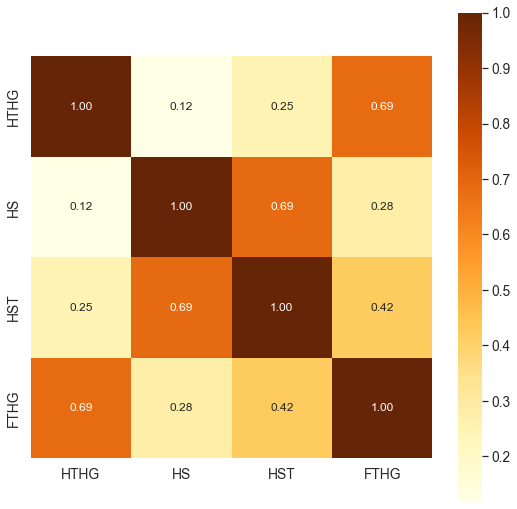

C:\Users\alisy\AppData\Local\Temp/ipykernel_55572/2384230753.py:33: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  attributes = data.drop(['Date','HomeTeam', 'AwayTeam', 'Referee', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR','HF', 'AF', 'FTAG', 'HTHG', 'HS', 'HST', 'FTHG'],1)


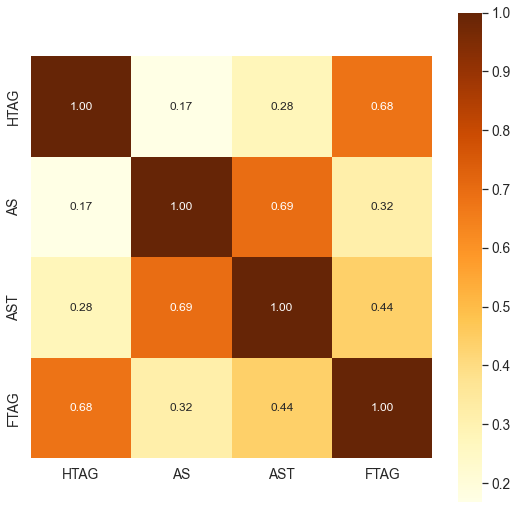

In [5]:
# plot Pearson Correlation Heatmap to see the top 10 features related to full time home goals FTHG

def plotGraph(X_all, Y_all):

    df = pd.concat([X_all,Y_all],axis=1)

    #FTHG correlation matrix
    plt.figure(figsize=(9,9))
    k = 8 # number of variables for heatmap
    corr = df.corr()
    sns.set(font_scale=1.25)
    hm = sns.heatmap(corr, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 12}, cmap="YlOrBr")
    plt.show()

attributes = data.drop(['Date','HomeTeam', 'AwayTeam', 'Referee', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR','HF', 'AF', 'FTHG', 'HTAG', 'AS', 'AST', 'FTAG'],1)
label = data['FTHG']
plotGraph(attributes,label)

# plot Pearson Correlation Heatmap to see the top 10 features related to full time away goals FTAG

def plotGraph(X_all, Y_all):

    df = pd.concat([X_all,Y_all],axis=1)

    #FTHG correlation matrix
    plt.figure(figsize=(9,9))
    k = 8 # number of variables for heatmap
    corr = df.corr()
    sns.set(font_scale=1.25)
    hm = sns.heatmap(corr, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 12}, cmap="YlOrBr")
    plt.show()

attributes = data.drop(['Date','HomeTeam', 'AwayTeam', 'Referee', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR','HF', 'AF', 'FTAG', 'HTHG', 'HS', 'HST', 'FTHG'],1)
label = data['FTAG']
plotGraph(attributes,label)

In [6]:
#Split dataset into input and output data

#Output variable
y = data.iloc[:, 5:6]
#Reformat y to make it suitable for LabelEncoder

y = np.array(y).reshape(len(y))

#Input variables
#Remove give away columns such as goals scored
data_filtered = data.drop(labels = data.columns[[3, 4, 5, 6, 7, 8]], axis = 1)

### 3.1.2 Initial Data Preprocessing
<a name='section312'></a>

In [7]:
#Data preprocessing

#Dates
data_filtered['Date'] = pd.to_datetime(data_filtered['Date'])
#year has been removed as we need to predict future results -> https://towardsdatascience.com/machine-learning-with-datetime-feature-engineering-predicting-healthcare-appointment-no-shows-5e4ca3a85f96
year = data_filtered['Date'].dt.year
data_filtered['Month'] = data_filtered['Date'].dt.month
data_filtered['Week'] = data_filtered['Date'].dt.isocalendar().week
data_filtered['Day'] = data_filtered['Date'].dt.day
#Extract encoded dates
dates_split = data_filtered.iloc[:, 16:19]
#Remove encoded dates and original date column
data_filtered = data_filtered.drop(labels = data_filtered.columns[[0, 16, 17, 18]], axis = 1)

#Encode categorical data
encoder = OneHotEncoder(handle_unknown='ignore')

#Teams
home_t = data_filtered.iloc[:, 0:1]
home_t = encoder.fit_transform(home_t) #################does this need to be done separately?

away_t = data_filtered.iloc[:, 1:2]
away_t = encoder.fit_transform(away_t) #################does this need to be done separately?
data_filtered = data_filtered.drop(labels = data_filtered.columns[[0,1]], axis = 1)

#Referees 
ref = data_filtered.iloc[:, 0:1]
ref = encoder.fit_transform(ref)       #################does this need to be done separately?
data_filtered = data_filtered.drop(labels = data_filtered.columns[[0]], axis = 1)

#Re-stack columns
data_filtered = data_filtered.join(pd.DataFrame(ref.toarray()), rsuffix = '_ref')
data_filtered = data_filtered.join(pd.DataFrame(home_t.toarray()), rsuffix = '_home')
data_filtered = data_filtered.join(pd.DataFrame(away_t.toarray()), rsuffix = '_away')
data_filtered = dates_split.join(data_filtered)
data_filtered.columns = data_filtered.columns.astype(str)
data_filtered.head()

,Month,Week,Day,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,0_home,1_home,2_home,3_home,4_home,5_home,6_home,7_home,8_home,9_home,10_home,11_home,12_home,13_home,14_home,15_home,16_home,17_home,18_home,19_home,20_home,21_home,22_home,23_home,24_home,25_home,26_home,27_home,28_home,29_home,30_home,31_home,32_home,33_home,34_home,35_home,36_home,37_home,38_home,39_home,40_home,41_home,42_home,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42
0,8,33,19,17,8,14,4,13,12,6,6,1,2,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8,33,19,17,12,10,5,19,14,7,7,1,2,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,8,33,19,6,16,3,9,15,21,8,4,5,3,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0

### 3.1.3 Training model on entire featureset
<a name='section313'></a>

In [8]:
#Train model on entire featureset
X_train, X_test, y_train, y_test = train_test_split(data_filtered, y, test_size=0.3, random_state=42)

y_train = np.array(y_train).reshape(len(y_train))
y_test = np.array(y_test).reshape(len(y_test))
#Encode y
encoder = LabelEncoder().fit(y_train)
y_train = encoder.transform(y_train)
y_test = encoder.transform(y_test)

rf, preds, base_accuracy = rf_model(X_train, X_test, y_train, y_test)
print("Accuracy on entire featureset: " + str(base_accuracy) + "%")


Accuracy on entire featureset: 56.64160401002506%


### 3.1.4 Random Forest Tree for entire featureset
<a name='section314'></a>

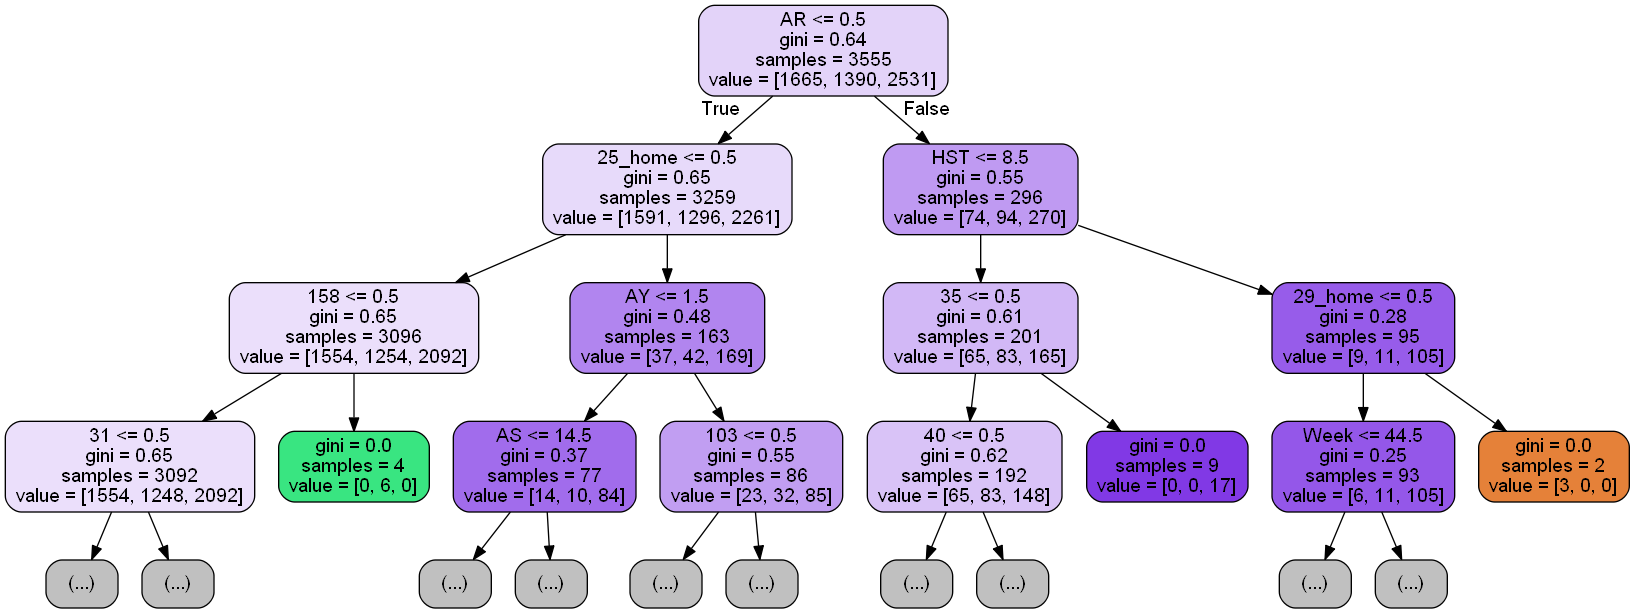

In [9]:
#Print rf tree N.B. may not work without importing graphviz, random forest images will be on GitHub
Image(filename = rf_tree_visualiser(rf, path.join("RF_Images", "featureSetTree"), data_filtered.columns))

### 3.1.5 Training model without Referee
<a name='section315'></a>

In [10]:
#Train model without Referee feature
data_filtered_no_ref = data_filtered.iloc[:, 0:15].join(data_filtered.iloc[:, 186:])
X_train, X_test, y_train, y_test = train_test_split(data_filtered_no_ref, y, test_size=0.3, random_state=42)

y_train = np.array(y_train).reshape(len(y_train))
y_test = np.array(y_test).reshape(len(y_test))
#Encode y
encoder = LabelEncoder().fit(y_train)
y_train = encoder.transform(y_train)
y_test = encoder.transform(y_test)


rf, preds, accuracy = rf_model(X_train, X_test, y_train, y_test)
print("Accuracy without Referee: " + str(accuracy) + "%")
print("Difference from before: " + str(accuracy - base_accuracy) + "%")
#Ref is having negative impact so remove
# data_filtered = data_filtered_no_ref

Accuracy without Referee: 56.89223057644111%
Difference from before: 0.2506265664160452%


### 3.1.6 Random Forest Tree without Referee
<a name='section316'></a>

In [ ]:
#Print rf tree (no ref)
Image(filename = rf_tree_visualiser(rf, path.join("RF_Images", "featureSetTreeNoRef"), data_filtered_no_ref.columns))

### 3.1.7 Training model without Date
<a name='section317'></a>

In [11]:
#Train model without Date feature
data_filtered_no_date = data_filtered.iloc[:, 3:]
X_train, X_test, y_train, y_test = train_test_split(data_filtered_no_date, y, test_size=0.3, random_state=42)

y_train = np.array(y_train).reshape(len(y_train))
y_test = np.array(y_test).reshape(len(y_test))
#Encode y
encoder = LabelEncoder().fit(y_train)
y_train = encoder.transform(y_train)
y_test = encoder.transform(y_test)


rf, preds, accuracy = rf_model(X_train, X_test, y_train, y_test)
print("Accuracy without Dates: " + str(accuracy) + "%")
print("Difference from before: " + str(accuracy - base_accuracy) + "%")

Accuracy without Dates: 56.4327485380117%
Difference from before: -0.20885547201336152%


### 3.1.8 Random Forest Tree without Date
<a name='section318'></a>

In [ ]:
#Print rf tree (no dates)
Image(filename = rf_tree_visualiser(rf, path.join("RF_Images",'featureSetTreeNoDate'), data_filtered_no_date.columns))

### 3.1.9 Training model on only in-game stats
<a name='section319'></a>

In [13]:
#Train model on only in-game stats to identify most important ones
data_filtered_no_ref = data_filtered.iloc[:, 0:15].join(data_filtered.iloc[:, 186:])
data_filtered_only_game_stats = data_filtered_no_ref.iloc[:, 3:15]
X_train, X_test, y_train, y_test = train_test_split(data_filtered_only_game_stats, y, test_size=0.3, random_state=42)

y_train = np.array(y_train).reshape(len(y_train))
y_test = np.array(y_test).reshape(len(y_test))
#Encode y
encoder = LabelEncoder().fit(y_train)
y_train = encoder.transform(y_train)
y_test = encoder.transform(y_test)


rf, preds, all_stats_accuracy = rf_model(X_train, X_test, y_train, y_test)
print("Accuracy on all in-game stats: " + str(all_stats_accuracy) + "%")

Accuracy on all in-game stats: 55.51378446115288%


### 3.1.10 Visualising selected features
<a name='section3110'></a>

In [15]:
#Visualise and analyse initial results

#Display feature importances in descending order
feature_importances = feat_importances(X_train, rf)
print("Feature Importances: ")
[print('Feature: {:35} Importance: {}'.format(*pair)) for pair in feature_importances];

print("\nConfusion Matrix: ")
print(confusion_matrix(y_test, preds))
print("\nClassification Report: ")
print(classification_report(y_test, preds))
#Important note: AF/HF rank higher than HC/AC

Feature Importances: 
Feature: HST                                 Importance: 0.12062860482667323
Feature: HS                                  Importance: 0.1095698299548388
Feature: AF                                  Importance: 0.10773279032401849
Feature: AS                                  Importance: 0.10644024578251926
Feature: HF                                  Importance: 0.10552340949204712
Feature: AST                                 Importance: 0.10340580600855823
Feature: HC                                  Importance: 0.09977784314864165
Feature: AC                                  Importance: 0.09278372110367616
Feature: AY                                  Importance: 0.06835535366590526
Feature: HY                                  Importance: 0.061179795298330265
Feature: AR                                  Importance: 0.01327811150903203
Feature: HR                                  Importance: 0.011324488885759381

Confusion Matrix: 
[[393  63 238]
 [175  73 355]
 [1

In [ ]:
# Visualise feature importance
scatter(feature_importances, "Feature importances", "Feature", "Importance")

C:\Users\alisy\AppData\Local\Temp/ipykernel_55572/1777785435.py:16: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  attributes = data.drop(['Date','HomeTeam', 'AwayTeam', 'Referee','FTR'],1)


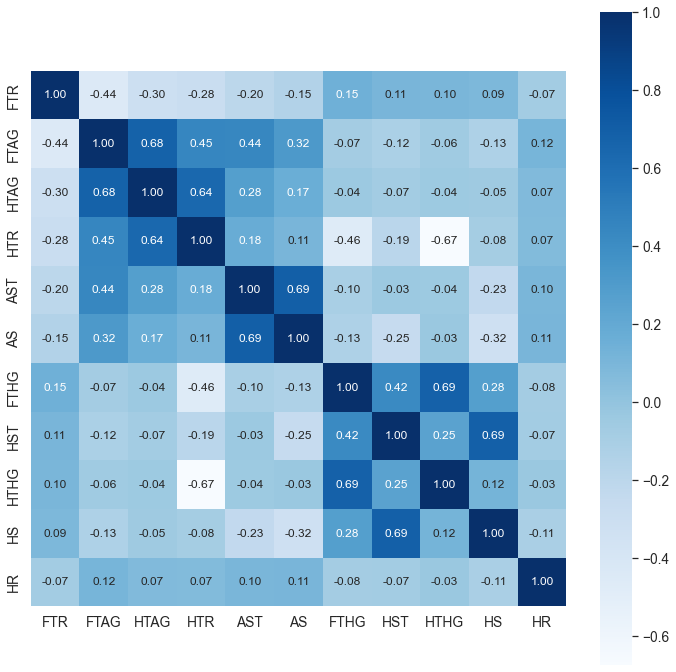

In [19]:
# plot Pearson Correlation Heatmap to see the top 10 features related to the match result FTR

def plotGraph(X_all, Y_all):

    df = pd.concat([X_all,Y_all],axis=1)

    #FTR correlation matrix
    plt.figure(figsize=(12,12))
    k = 11 # number of variables for heatmap
    cols = abs(df.astype(float).corr()).nlargest(k, 'FTR')['FTR'].index
    cm = np.corrcoef(df[cols].values.T)
    sns.set(font_scale=1.25)
    hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 12}, cmap="Blues", yticklabels=cols.values, xticklabels=cols.values)
    plt.show()

attributes = data.drop(['Date','HomeTeam', 'AwayTeam', 'Referee','FTR'],1)
attributes['HTR'] = attributes['HTR'].map({'H':0,'A':2,'D':1}) 
label = data['FTR']
label = label.map({'H':1,'A':0,'D':2})
plotGraph(attributes,label)


In [16]:
#Feature Selection using select_feat helper method
selected_feat = select_feat(X_train, y_train)
print(selected_feat)

Index(['HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC'], dtype='object')


In [17]:
#Train model on selected in-game stats only
indexes = []
for feat in selected_feat:
    indexes.append(data_filtered_only_game_stats.columns.get_loc(feat))
    
data_filtered_filtered_game_stats = data_filtered_only_game_stats.iloc[:, indexes]

X_train, X_test, y_train, y_test = train_test_split(data_filtered_filtered_game_stats, y, test_size=0.3, random_state=42)

y_train = np.array(y_train).reshape(len(y_train))
y_test = np.array(y_test).reshape(len(y_test))
#Encode y
encoder = LabelEncoder().fit(y_train)
y_train = encoder.transform(y_train)
y_test = encoder.transform(y_test)


rf, preds, reduced_stats_accuracy = rf_model(X_train, X_test, y_train, y_test)
print("Accuracy on reduced in-game stats: " + str(reduced_stats_accuracy) + "%")
print("Difference compared to all in-game stats: " + str(reduced_stats_accuracy - all_stats_accuracy) + "%")

print("\nConfusion Matrix: ")
print(confusion_matrix(y_test, preds))
print("\nClassification Report: ")
print(classification_report(y_test, preds))

Accuracy on reduced in-game stats: 54.92898913951546%
Difference compared to all in-game stats: -0.5847953216374222%

Confusion Matrix: 
[[379  72 243]
 [163  79 361]
 [149  91 857]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.55      0.55      0.55       694
           1       0.33      0.13      0.19       603
           2       0.59      0.78      0.67      1097

    accuracy                           0.55      2394
   macro avg       0.49      0.49      0.47      2394
weighted avg       0.51      0.55      0.51      2394



In [ ]:
#Visualisation of new featureset/tree
data_filtered_filtered_game_stats.plot(kind='hist', subplots=True, sharex=False, sharey=False, bins=50, layout=(2,4), figsize=(12, 6))
data_filtered_filtered_game_stats.plot(kind='box', subplots=True, layout=(2,4), sharex=False, sharey=False, figsize=(12, 6))
data_filtered_filtered_game_stats.plot(kind='density', subplots=True, layout=(2,4), sharex=False, sharey=False, figsize=(12, 6))
Image(filename = rf_tree_visualiser(rf, path.join("RF_Images", 'selectedFeatureSetTree'), data_filtered_filtered_game_stats.columns))

In [ ]:
#Produce new dataset
#Fix column names
#Restack teams and dates

#Original teams are needed to be able to compute priors
data_new = data.iloc[:, [1, 2]].join(data_filtered_filtered_game_stats)
data_new = dates_split.join(data_new)

#Stack previously removed giveaway columns
data_new = data_new.join(data.iloc[:, [3, 4, 5, 6, 7, 8]])

#Feature engineer second half goals
#Second half home goals
SHHG = np.array(data.iloc[:, [3]]) - np.array(data.iloc[:, [6]])
#Second half away goals
SHAG = np.array(data.iloc[:, [4]]) - np.array(data.iloc[:, [7]])
data_new['SHHG'] = pd.DataFrame(SHHG)
data_new['SHAG'] = pd.DataFrame(SHAG)
data_new.columns = data_new.columns.astype(str)
data_new.head()

In [ ]:
#See if second half goals have significant correlation to total goals
highest_corr = corr_matrix(data_new, "FTHG")
print("FTHG: \n" + str(highest_corr))

highest_corr = corr_matrix(data_new, "FTAG")
print("FTAG: \n" + str(highest_corr))
#Second half goals do have very strong correlation

## 3.2 Priors Feature Construction
<a name='section32'></a>

In [ ]:
# From Pearson Correlation Heatmap to extract the top 10 features 
# there are two pairs of data highly correlated (see details in report), 
# so we just pick [FTHG, FTAG, HS, AS, HR, AR] from the top 10 features,
# additionally [Date, HomeTeam, AwayTeam, FTR], to derive our features.
selectedAttributes = ["Date","HomeTeam", "AwayTeam","FTR","FTHG","FTAG","HS","AS","HR","AR"]
training_data = data[selectedAttributes]

### 3.2.1 Data Cleaning
<a name='section321'></a>

In [ ]:
#Derive features and remove unwanted data
def removeInvalidData(data):

    # remove data which contains None
    data.dropna(axis=0, how='any',inplace=True)

    # remove data which contains NaN, infinite or overflowed number 
    indices_to_keep = ~data.isin([np.nan, np.inf, -np.inf]).any(1)
    data = data[indices_to_keep]

    return data

#check if there are rows containing None, NaN, infinite or overflowed values
assert data.shape[0] == removeInvalidData(data).shape[0]
data = removeInvalidData(data)

In [ ]:
# convert the different date formats and convert the type from str to timestamp  
def convertDate(data):
    if not isinstance(data.Date[0],str):
        return

    newDate = []
    for _, matchInfo in data.iterrows():
        if len(matchInfo.Date) == 8 :
            newDate.append(pd.to_datetime(matchInfo.Date, format="%d/%m/%y" ))
        elif len(matchInfo.Date) == 9 :
            newDate.append(pd.to_datetime(matchInfo.Date, format="%d %b %y" ))  # the date format in test data
        elif len(matchInfo.Date) == 10 :
            newDate.append(pd.to_datetime(matchInfo.Date, format="%d/%m/%Y" ))
    
    data['Date'] = pd.Series(newDate).values

    return data

### 3.2.2 Cumulative Full-time W/L Ratio
<a name='section322'></a>

In [ ]:
# Computing Priors
# Calculate cumulative Full-Time win-loss ratio for Home/Away teams prior to every match
# TODO: Points-based results based on previous wins & losses 
# PHWL = Previous Home Team Win Loss Ratio
# PAWL = Previous Away Team Win Loss Ratio

def get_previousFTResults(playing_stat):
    
    # Create a dictionary with team names as keys
    teams = {}
    PHWL = []
    PAWL = []
    
    for i in playing_stat.groupby('HomeTeam').mean().T.columns:
        teams[i] = [] #Each team gets their own list

    # the value corresponding to keys is a list containing the match result
    for i in range(len(playing_stat)):
        
        #list of respective Home/Away team in match
        match_ht = teams[playing_stat.iloc[i].HomeTeam]
        match_at = teams[playing_stat.iloc[i].AwayTeam]
        
        #count no. of wins
        
        h_wins = Counter(match_ht)
        a_wins = Counter(match_at)
        
        #h_wins = no. of home wins
        #a_wins = no. of away wins
        h_wins = h_wins['W']
        a_wins = a_wins['W']
        
        #append W/L/D to respective teams
        
        if y[i] == 'H':
            match_ht.append('W')
            match_at.append('L')
        elif y[i] == 'A':
            match_at.append('W')
            match_ht.append('L')
        else:
            match_at.append('D')
            match_ht.append('D')
       
        h_wlRatio = h_wins / len(match_ht)
        a_wlRatio = a_wins / len(match_at)
        
        #Home/Away cumulative WL ratios prior to every match
        PHWL.append(h_wlRatio)
        PAWL.append(a_wlRatio)
        
    playing_stat.loc[:,'PHWL'] = pd.Series(PHWL)
    playing_stat.loc[:,'PAWL'] = pd.Series(PAWL)

    return playing_stat

###  3.2.3 Cumulative Half-time W/L Ratio
<a name='section323'></a>

In [ ]:
# Computing Priors
# Calculate cumulative Half-Time win-loss ratio for Home/Away teams prior to every match
# HHTR = Previous Home Half Time Results
# AHTR = Previous Away Half Time Results

def get_PreviousHTResults(playing_stat):
    
    # Create a dictionary with team names as keys
    teams = {}
    HHTR = []
    AHTR = []
    
    for i in playing_stat.groupby('HomeTeam').mean().T.columns:
        teams[i] = [] #Each team gets their own list

    # the value corresponding to keys is a list containing the match result
    for i in range(len(playing_stat)):
        
        #list of respective Home/Away team in match
        match_ht = teams[playing_stat.iloc[i].HomeTeam]
        match_at = teams[playing_stat.iloc[i].AwayTeam]
        
        #count no. of wins
        
        h_wins = Counter(match_ht)
        a_wins = Counter(match_at)
        
        #h_wins = no. of home wins
        #a_wins = no. of away wins
        h_wins = h_wins['W']
        a_wins = a_wins['W']
        
        #append W/L/D to respective teams
        
        if playing_stat.iloc[i].HTR == 'H':
            match_ht.append('W')
            match_at.append('L')
        elif playing_stat.iloc[i].HTR == 'A':
            match_at.append('W')
            match_ht.append('L')
        else:
            match_at.append('D')
            match_ht.append('D')
            
        h_wlRatio = h_wins / len(match_ht)
        a_wlRatio = a_wins / len(match_at)
       
        #Home/Away cumulative WL ratios prior to every match
        HHTR.append(h_wlRatio)
        AHTR.append(a_wlRatio)
        
    playing_stat.loc[:,'HHTR'] = pd.Series(HHTR)
    playing_stat.loc[:,'AHTR'] = pd.Series(AHTR)

    return playing_stat

### 3.2.4 Cumulative Full-Time goals scored
<a name='section324'></a>

In [ ]:
# Computing Priors
# Calculate Previous Full-Time Cumulative Goal 
# PHGS = Previous Home Goal Scored
# PAGS = Previous Away Goal Scored

def getPreviousCumulativeGoals(priorData):
    teams = {}
    PHGS = [] 
    PAGS = []   

    # for each match
    for i in range(len(priorData)):
        if (i % 100000 == 0):
            for name in priorData.groupby('HomeTeam').mean().T.columns:
                teams[name] = [0]

        FTHG = priorData.iloc[i]['FTHG']
        FTAG = priorData.iloc[i]['FTAG']

        try:
            pcgs_h = teams[priorData.iloc[i].HomeTeam].pop()
            pcgs_a = teams[priorData.iloc[i].AwayTeam].pop()
        except:
            pcgs_h = 0
            pcgs_a = 0

        PHGS.append(pcgs_h)
        PAGS.append(pcgs_a)
        pcgs_h = pcgs_h + FTHG #Home team's previous goals scored before this match
        teams[priorData.iloc[i].HomeTeam].append(pcgs_h)
        pcgs_a = pcgs_a + FTAG #Away team's previous goals scored before this match
        teams[priorData.iloc[i].AwayTeam].append(pcgs_a)

    priorData.loc[:,'PHGS'] = pd.Series(PHGS)
    priorData.loc[:,'PAGS'] = pd.Series(PAGS)
    return priorData

### 3.2.5 Computing Previous Match Shots
<a name='section325'></a>

In [ ]:
# Computing Priors
# Calculate Previous Shots in the match
# PHS = Home teams previous match Shots, totaled over season
# PAS = Away teams previous match Shots, totaled over season

def getPreviousShots(priorData):
    teams = {}
    PHS = [] 
    PAS = []   

    # for each match
    for i in range(len(priorData)):
        if (i % 100000 == 0):
            for name in priorData.groupby('HomeTeam').mean().T.columns:
                teams[name] = [0]

        HS = priorData.iloc[i]['HS']
        AS = priorData.iloc[i]['AS']

        try:
            pcs_h = teams[priorData.iloc[i].HomeTeam].pop()
            pcs_a = teams[priorData.iloc[i].AwayTeam].pop()
        except:
            pcs_h = 0
            pcs_a = 0

        PHS.append(pcs_h)
        PAS.append(pcs_a)
        pcs_h = pcs_h + HS #Home team's previous goals scored before this match
        teams[priorData.iloc[i].HomeTeam].append(pcs_h)
        pcs_a = pcs_a + AS #Away team's previous goals scored before this match
        teams[priorData.iloc[i].AwayTeam].append(pcs_a)

    priorData.loc[:,'PHS'] = pd.Series(PHS)
    priorData.loc[:,'PAS'] = pd.Series(PAS)
    return priorData

### 3.2.6 Computing Previous Shots on Target
<a name='section326'></a>

In [ ]:
# Computing Priors
# Calculate Previous Shots on Target
# PHSOT = Home teams Previous Shots on Target, totaled over season
# PASOT = Away teams Previous Shots on Target, totaled over season

def getPreviousShotsOnTarget(priorData):
    teams = {}
    PHSOT = [] 
    PASOT = []   

    # for each match
    for i in range(len(priorData)):
        if (i % 100000 == 0):
            for name in priorData.groupby('HomeTeam').mean().T.columns:
                teams[name] = [0]

        HST = priorData.iloc[i]['HST']
        AST = priorData.iloc[i]['AST']

        try:
            pcsot_h = teams[priorData.iloc[i].HomeTeam].pop()
            pcsot_a = teams[priorData.iloc[i].AwayTeam].pop()
        except:
            pcsot_h = 0
            pcsot_a = 0

        PHSOT.append(pcsot_h)
        PASOT.append(pcsot_a)
        pcsot_h = pcsot_h + HST #Home team's previous goals scored before this match
        teams[priorData.iloc[i].HomeTeam].append(pcsot_h)
        pcsot_a = pcsot_a + AST #Away team's previous goals scored before this match
        teams[priorData.iloc[i].AwayTeam].append(pcsot_a)

    priorData.loc[:,'PHSOT'] = pd.Series(PHSOT)
    priorData.loc[:,'PASOT'] = pd.Series(PASOT)
    return priorData

### 3.2.7 Computing previous fouls
<a name='section327'></a>

In [ ]:
# Computing Priors
# Calculate Previous Fouls
# PHTF = Home teams Previous Fouls, Totaled over season
# PATF = Away teams Previous Fouls, Totaled over season

def getPreviousTeamFouls(priorData):
    teams = {}
    PHTF = [] 
    PATF = []   

    # for each match
    for i in range(len(priorData)):
        if (i % 100000 == 0):
            for name in priorData.groupby('HomeTeam').mean().T.columns:
                teams[name] = [0]

        HF = priorData.iloc[i]['HF']
        AF = priorData.iloc[i]['AF']

        try:
            pcf_h = teams[priorData.iloc[i].HomeTeam].pop()
            pcf_a = teams[priorData.iloc[i].AwayTeam].pop()
        except:
            pcf_h = 0
            pcf_a = 0

        PHTF.append(pcf_h)
        PATF.append(pcf_a)
        pcf_h = pcf_h + HF #Home team's previous fouls before this match
        teams[priorData.iloc[i].HomeTeam].append(pcf_h)
        pcf_a = pcf_a + AF #Away team's previous fouls before this match
        teams[priorData.iloc[i].AwayTeam].append(pcf_a)

    priorData.loc[:,'PHTF'] = pd.Series(PHTF)
    priorData.loc[:,'PATF'] = pd.Series(PATF)
    return priorData

### 3.2.8 Computing previous corners
<a name='section328'></a>

In [ ]:
# Computing Priors
# Calculate Previous Corners
# PHTC = Home teams Previous Corners, Totaled over season
# PATC = Away teams Previous Corners, Totaled over season

def getPreviousTeamCorners(priorData):
    teams = {}
    PHTC = [] 
    PATC = []   

    # for each match
    for i in range(len(priorData)):
        if (i % 100000 == 0):
            for name in priorData.groupby('HomeTeam').mean().T.columns:
                teams[name] = [0]

        HC = priorData.iloc[i]['HC']
        AC = priorData.iloc[i]['AC']

        try:
            pcc_h = teams[priorData.iloc[i].HomeTeam].pop()
            pcc_a = teams[priorData.iloc[i].AwayTeam].pop()
        except:
            pcc_h = 0
            pcc_a = 0

        PHTC.append(pcc_h)
        PATC.append(pcc_a)
        pcc_h = pcc_h + HC #Home team's previous corners before this match
        teams[priorData.iloc[i].HomeTeam].append(pcc_h)
        pcc_a = pcc_a + AC #Away team's previous corners before this match
        teams[priorData.iloc[i].AwayTeam].append(pcc_a)

    priorData.loc[:,'PHTC'] = pd.Series(PHTC)
    priorData.loc[:,'PATC'] = pd.Series(PATC)
    return priorData

### 3.2.9 Computing previous goals before half-time
<a name='section329'></a>

In [ ]:
# Computing Priors
# Calculate Previous Goals before half time
# PHTHG = Home teams Previous Goals Before Half Time, Totaled over season
# PHTAG = Away teams Previous Goals Before Half Time, Totaled over season

def getPreviousHalfTimeGoalsScored(priorData):
    teams = {}
    PHTHG = [] 
    PHTAG = []   

    # for each match
    for i in range(len(priorData)):
        if (i % 100000 == 0):
            for name in priorData.groupby('HomeTeam').mean().T.columns:
                teams[name] = [0]

        HTHG = priorData.iloc[i]['HTHG']
        HTAG = priorData.iloc[i]['HTAG']

        try:
            pchtg_h = teams[priorData.iloc[i].HomeTeam].pop()
            pchtg_a = teams[priorData.iloc[i].AwayTeam].pop()
        except:
            pchtg_h = 0
            pchtg_a = 0

        PHTHG.append(pchtg_h)
        PHTAG.append(pchtg_a)
        pchtg_h = pchtg_h + HTHG #Home team's previous first half goals scored before this match
        teams[priorData.iloc[i].HomeTeam].append(pchtg_h)
        pchtg_a = pchtg_a + HTAG #Away team's previous first half goals scored before this match
        teams[priorData.iloc[i].AwayTeam].append(pchtg_a)

    priorData.loc[:,'PHTHG'] = pd.Series(PHTHG)
    priorData.loc[:,'PHTAG'] = pd.Series(PHTAG)
    return priorData

### 3.2.10 Compute previous goals after half-time
<a name='section3210'></a>

In [ ]:
# Computing Priors
# Calculate Previous Second Half Time Goals in the match
# PSHHG = Previous Second Half Time Goals scored by Home team, totaled over season
# PSHAG = Previous Second Half Time Goals scored by Away team, totaled over season

def getPreviousSecondHalfGoals(priorData):
    teams = {}
    PSHHG = [] 
    PSHAG = []   
    
    # for each match
    for i in range(len(priorData)):
        if (i % 100000 == 0):
            for name in priorData.groupby('HomeTeam').mean().T.columns:
                teams[name] = [0]
                
        FTHG = priorData.iloc[i]['FTHG']
        FTAG = priorData.iloc[i]['FTAG']
        HTHG = priorData.iloc[i]['HTHG']
        HTAG = priorData.iloc[i]['HTAG']

        try:
            shg_h = teams[priorData.iloc[i].HomeTeam].pop()
            shg_a = teams[priorData.iloc[i].AwayTeam].pop()
        except:
            shg_h = 0
            shg_a = 0

        PSHHG.append(shg_h)
        PSHAG.append(shg_a)
        shg_h = shg_h + (FTHG - HTHG) #Home team's previous second half goals scored before this match
        teams[priorData.iloc[i].HomeTeam].append(shg_h)
        shg_a = shg_a + (FTAG - HTAG) #Away team's previous second half goals scored before this match
        teams[priorData.iloc[i].AwayTeam].append(shg_a)

    priorData.loc[:,'PSHHG'] = pd.Series(PSHHG)
    priorData.loc[:,'PSHAG'] = pd.Series(PSHAG)
    return priorData

### 3.2.11 Computing previous goals conceded before half-time
<a name='section3211'></a>

In [ ]:
# Computing Priors
# Calculate previous goals conceded before half-time
# PHTHGC = Home Team Previous Goals Conceded Before Half Time, totaled over season
# PHTAGC = Away Team Previous Goals Conceded Before Half Time, Totaled over season

def getPreviousHalfTimeGoalConceded(priorData):
    teams = {}
    PHTHGC = [] 
    PHTAGC = []   
    
    # for each match
    for i in range(len(priorData)):
        if (i % 100000 == 0):
            for name in priorData.groupby('HomeTeam').mean().T.columns:
                teams[name] = [0]
                      
        HTHG = priorData.iloc[i]['HTHG']
        HTAG = priorData.iloc[i]['HTAG']

        try:
            phtgc_h = teams[priorData.iloc[i].HomeTeam].pop()
            phtgc_a = teams[priorData.iloc[i].AwayTeam].pop()
        except:
            phtgc_h = 0
            phtgc_a = 0

        PHTHGC.append(phtgc_h)
        PHTAGC.append(phtgc_a)
        phtgc_h = phtgc_h + HTAG #Home team's previous half time goals conceded before this match
        teams[priorData.iloc[i].HomeTeam].append(phtgc_h)
        phtgc_a = phtgc_a + HTHG #Away team's previous half time goals conceded before this match
        teams[priorData.iloc[i].AwayTeam].append(phtgc_a)

    priorData.loc[:,'PHTHGC'] = pd.Series(PHTHGC)
    priorData.loc[:,'PHTAGC'] = pd.Series(PHTAGC)
    return priorData

### 3.2.12 Computing previous goals conceded after half-time
<a name='section3212'></a>

In [ ]:
# Computing Priors
# Calculate previous goals conceded after half-time
# PSHHGC = Previous second half home team goals conceded, totaled over season
# PSHAGC = Previous second half away team goals conceded, totaled over season

def getPreviousSecondHalfGoalConceded(priorData):
    teams = {}
    PSHHGC = [] 
    PSHAGC = []   
    
    # for each match
    for i in range(len(priorData)):
        if (i % 100000 == 0):
            for name in priorData.groupby('HomeTeam').mean().T.columns:
                teams[name] = [0]
  
        FTHG = priorData.iloc[i]['FTHG']
        FTAG = priorData.iloc[i]['FTAG']   
        HTHG = priorData.iloc[i]['HTHG']
        HTAG = priorData.iloc[i]['HTAG']

        try:
            pshhgc_h = teams[priorData.iloc[i].HomeTeam].pop()
            pshhgc_a = teams[priorData.iloc[i].AwayTeam].pop()
        except:
            pshhgc_h = 0
            pshhgc_a = 0

        PSHHGC.append(pshhgc_h)
        PSHAGC.append(pshhgc_a)
        pshhgc_h = pshhgc_h + (FTAG - HTAG) #Home team's previous half time goals conceded before this match
        teams[priorData.iloc[i].HomeTeam].append(pshhgc_h)
        pshhgc_a = pshhgc_a + (FTHG - HTHG) #Away team's previous half time goals conceded before this match
        teams[priorData.iloc[i].AwayTeam].append(pshhgc_a)

    priorData.loc[:,'PSHHGC'] = pd.Series(PSHHGC)
    priorData.loc[:,'PSHAGC'] = pd.Series(PSHAGC)
    return priorData

### 3.2.13 Total Matches Played
<a name='section3213'></a>

In [ ]:
# Computing Priors 
# Calculate previous goals conceded after half-time
# PMPH = Previous total matches played for home team
# PMPA = Previous total matches played for away team
def getPreviousMatchesPlayed(priorData):
    teams = {}
    PMPH = [] 
    PMPA = []   
    
    # for each match
    for i in range(len(priorData)):
        if (i % 100000 == 0):
            for name in priorData.groupby('HomeTeam').mean().T.columns:
                teams[name] = [0]

        try:
            pmp_h = teams[priorData.iloc[i].HomeTeam].pop()
            pmp_a = teams[priorData.iloc[i].AwayTeam].pop()
        except:
            pmp_h = 0
            pmp_a = 0

        PMPH.append(pmp_h)
        PMPA.append(pmp_a)
        pmp_h = pmp_h + 1 #Home team's previous number matches played
        teams[priorData.iloc[i].HomeTeam].append(pmp_h)
        pmp_a = pmp_a + 1 #Away team's previous number matches played
        teams[priorData.iloc[i].AwayTeam].append(pmp_a)

    priorData.loc[:,'PMPH'] = pd.Series(PMPH)
    priorData.loc[:,'PMPA'] = pd.Series(PMPA)
    return priorData

print(getPreviousMatchesPlayed(data_new))

## 3.3 Additional Features
<a name='section33'></a>

### 3.3.1 Distance Travelled for Away Teams
<a name='section331'></a>

In [ ]:
# DIS
# The positionalData contains the latitude and longitude of teams
def getDistance(priorData):
  array = []
  for x in priorData.iterrows():
   
    home_lat = (positionalData.loc[positionalData['Team'] == x[1].HomeTeam]).Latitude
    home_long = (positionalData.loc[positionalData['Team'] == x[1].HomeTeam]).Longitude
    home_location = (np.float32(home_lat), np.float32(home_long))
    
    away_lat = (positionalData.loc[positionalData['Team'] == x[1].AwayTeam]).Latitude
   
    away_long = (positionalData.loc[positionalData['Team'] == x[1].AwayTeam]).Longitude
    away_location = (np.float32(away_lat), np.float32(away_long))
    array.append(np.float32(geodesic(home_location, away_location).km))
  
  
  DIS = pd.Series(array)
  priorData.loc[:,'DIS'] = DIS

  return priorData

### 3.3.2 Average shots on goal in the past 3 matches
<a name='section332'></a>

In [ ]:
# Average shots on goal for the past 3 matches
# HAS, AAS
def getPreviousShotOnGoal_3(priorData):
    teams = {}
    HAS = [] 
    AAS = []   
    
    for name in priorData.groupby('HomeTeam').mean().T.columns:
                teams[name] = deque([None, None, None]) #[3rd, 2nd, latest priorData]
            
    # for each match
    for i in range(len(priorData)):

            
        try:
            as_h = np.mean(teams[priorData.iloc[i].HomeTeam])
            as_a = np.mean(teams[priorData.iloc[i].AwayTeam])
        except:
            as_h = None
            as_a = None

        HAS.append(as_h)
        AAS.append(as_a)

        teams[priorData.iloc[i].HomeTeam].popleft()
        teams[priorData.iloc[i].HomeTeam].append(priorData.iloc[i].HS)

        teams[priorData.iloc[i].AwayTeam].popleft()
        teams[priorData.iloc[i].AwayTeam].append(priorData.iloc[i].AS)

    priorData.loc[:,'HAS'] = pd.Series(HAS)
    priorData.loc[:,'AAS'] = pd.Series(AAS)

    return priorData

### 3.3.3 WL Performance of past 3 matches
<a name='section333'></a>

In [ ]:
# Performance of Home-Away teams in past 3 matches
# HM1, AM1, HM2, AM2, HM3, AM3
def getPerformanceOfLast3Matches(priorData):
    HM1 = []    # performance of the last match of home team
    AM1 = []    # performance of the last match of away team

    HM2 = []    # performance of the 2nd last match of home team
    AM2 = []

    HM3 = []    # performance of the 3rd last match of home team
    AM3 = []

    teams = {}
    
    for name in priorData.groupby('HomeTeam').mean().T.columns:
               teams[name] = deque([None, None, None])  #[3rd, 2nd, latest priorData]

    for i in range(len(priorData)):
        

        HM3.append(teams[priorData.iloc[i].HomeTeam].popleft())
        AM3.append(teams[priorData.iloc[i].AwayTeam].popleft())
        HM2.append(teams[priorData.iloc[i].HomeTeam][0])
        AM2.append(teams[priorData.iloc[i].AwayTeam][0])
        HM1.append(teams[priorData.iloc[i].HomeTeam][1])
        AM1.append(teams[priorData.iloc[i].AwayTeam][1])

        if priorData.iloc[i].FTR == 'H':
            teams[priorData.iloc[i].HomeTeam].append('W')
            teams[priorData.iloc[i].AwayTeam].append('L')
        elif priorData.iloc[i].FTR == 'A':
            teams[priorData.iloc[i].AwayTeam].append('W')
            teams[priorData.iloc[i].HomeTeam].append('L')
        else:
            teams[priorData.iloc[i].AwayTeam].append('D')
            teams[priorData.iloc[i].HomeTeam].append('D')

    priorData.loc[:,'HM1'] = HM1
    priorData.loc[:,'AM1'] = AM1
    priorData.loc[:,'HM2'] = HM2
    priorData.loc[:,'AM2'] = AM2
    priorData.loc[:,'HM3'] = HM3
    priorData.loc[:,'AM3'] = AM3

    return priorData

### 3.3.4 Cumulative Full Time Goal Difference
<a name='section334'></a>

In [ ]:
# Computing Priors
# Calculate cumulative Full-Time goal different for Home/Away teams prior to every match
# HCGD = Home Cumulative Goal Difference
# ACGD = Away Cumulative Goal Difference
def getCumulativeGoalsDiff(priorData):
    teams = {}
    HCGD = [] 
    ACGD = []   

    # for each match
    for i in range(len(priorData)):
        # as the result in 3.2.1 shows that the number of matchese per season is always the same, so here we simply use i%380==0 to check if it is a new season and to initialize the feature.
        if (i % 380 == 0):
            for name in priorData.groupby('HomeTeam').mean().T.columns:
                teams[name] = []

        FTHG = priorData.iloc[i]['FTHG']
        FTAG = priorData.iloc[i]['FTAG']

        try:
            cgd_h = teams[priorData.iloc[i].HomeTeam].pop()
            cgd_a = teams[priorData.iloc[i].AwayTeam].pop()
        except:
            cgd_h = 0
            cgd_a = 0

        HCGD.append(cgd_h)
        ACGD.append(cgd_a)
        cgd_h = cgd_h + FTHG - FTAG
        teams[priorData.iloc[i].HomeTeam].append(cgd_h)
        cgd_a = cgd_a + FTAG - FTHG
        teams[priorData.iloc[i].AwayTeam].append(cgd_a)

    priorData.loc[:,'HCGD'] = pd.Series(HCGD)
    priorData.loc[:,'ACGD'] = pd.Series(ACGD)

    return priorData

### Priors - extra features pulled

In [ ]:
def add_pickled_to_df(df,filename,column):
    matrix = pd.read_pickle(filename)
    matrix[2008] = np.NaN
    difference = []
    for i in range(0,len(data_new)):
        if pd.isnull(matrix[year[i]].loc[df["HomeTeam"].iloc[i]]) or pd.isnull(matrix[year[i]].loc[df["AwayTeam"].iloc[i]]):
            difference.append(np.nan)
            
        else:
            difference.append(matrix[year[i]].loc[df["HomeTeam"].iloc[i]]-matrix[year[i]].loc[df["AwayTeam"].iloc[i]])

    df[column]=difference
    return df

### We have decided not to include these scraped features due to the many missing values without a reliable way to impute them.

In [ ]:
# import glob
# files = glob.glob("./Pickles/*")
# for file in files:
#     name = file.split("\\")[-1].split(".")[0].replace("DF","")
#     data_new = add_pickled_to_df(data_new,file,name)

# data_new

## 3.4 Derive Priors
<a name='section34'></a>

In [ ]:
def DerivePriors(priorData):
    #get_previousFTResults(priorData) # dont want Full time results in the test data
    get_PreviousHTResults(priorData)
    getPreviousCumulativeGoals(priorData)
    getPreviousShots(priorData)
    getPreviousShotsOnTarget(priorData)
    getPreviousTeamFouls(priorData)
    getPreviousTeamCorners(priorData)
    getPreviousHalfTimeGoalsScored(priorData)
    getPreviousSecondHalfGoals(priorData)
    getPreviousHalfTimeGoalConceded(priorData)
    getPreviousSecondHalfGoalConceded(priorData)
    getPreviousMatchesPlayed(priorData)
    getDistance(priorData)
    getPreviousShotOnGoal_3(priorData)
    getPerformanceOfLast3Matches(priorData)
    getCumulativeGoalsDiff(priorData)
    return priorData

In [ ]:
# Remove First Initial Season
data_new = DerivePriors(data_new).iloc[380:] #chop off first season 
y=np.delete(y,slice(0,380),axis=0)
data_new.reset_index(drop=True, inplace=True)
data_new 

### 3.5 Final Data Preprocessing
<a name='section35'></a>

In [ ]:
# Dates are transformed into their sin/cos representation to capture their cyclic nature and reduce dimensionality, further explanation is given in the report
dates = data_new.iloc[:, 0:3]
month_sin = transformation(dates["Month"])[0]
month_cos = transformation(dates["Month"])[1]
week_sin = transformation(dates["Week"])[0]
week_cos = transformation(dates["Week"])[1]
day_sin = transformation(dates["Day"])[0]
day_cos = transformation(dates["Day"])[1]

teams = pd.DataFrame(home_t.toarray()).add_prefix("home_").join(pd.DataFrame(away_t.toarray()).add_prefix("away_"))

# Select only columns that contain priors, can't use in-game stats to predict the future
priors = data_new.iloc[:, 21:44]

# Compute custom features
# PHGS_PHSOT is ratio of home goals to home shots on target
PHGS_PHSOT = np.where(priors["PHSOT"] != 0, priors["PHGS"]/priors["PHSOT"], 0)
# PHGS_PHSOT is ratio of away goals to away shots on target
PAGS_PASOT = np.where(priors["PASOT"] != 0, priors["PAGS"]/priors["PASOT"], 0)
# PHSOT_PHS is ratio of home shots on target to home shots
PHSOT_PHS = np.where(priors["PHS"] != 0, priors["PHSOT"]/ (priors["PHS"] + priors["PHSOT"]), 0)
# PASOT_PAS is ratio of away shots on target to away shots
PASOT_PAS = np.where(priors["PAS"] != 0, priors["PASOT"]/ (priors["PAS"] + priors["PASOT"]), 0)
# PHTF_PATF is ratio of home fouls to away fouls
PHTF_PATF = np.where(priors["PATF"] != 0, priors["PHTF"]/priors["PATF"], 0)

# Building final dataset
X = pd.DataFrame()
X["month_cos"] = month_cos
X["month_sin"] = month_sin
X["week_cos"] = week_cos
X["week_sin"] = week_sin
X["day_cos"] = day_cos
X["day_sin"] = day_sin
X = X.join(teams).join(priors)
X["PHGS_PHSOT"] = PHGS_PHSOT.tolist()
X["PAGS_PASOT"] = PAGS_PASOT.tolist()
X["PHSOT_PHS"] = PHSOT_PHS.tolist()
X["PASOT_PAS"] = PASOT_PAS.tolist()
X["PHTF_PATF"] = PHTF_PATF.tolist()
X

### 3.5.1 Split Data
<a name='section351'></a>

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, shuffle=False)

y_train = np.array(y_train).reshape(len(y_train))
y_val = np.array(y_val).reshape(len(y_val))
y_test = np.array(y_test).reshape(len(y_test))
#Encode y
encoder = LabelEncoder().fit(y_train)
y_train = encoder.transform(y_train)
y_val = encoder.transform(y_val)
y_test = encoder.transform(y_test)


y_train_categorical = keras.utils.to_categorical(y_train)
y_val_categorical = keras.utils.to_categorical(y_val)
y_test_categorical = keras.utils.to_categorical(y_test)

In [ ]:
# try without our custom features
rf, preds, all_stats_accuracy = rf_model(X_train, X_test, y_train, y_test)
print("Accuracy on all in-game stats: " + str(all_stats_accuracy) + "%")

feature_importances = feat_importances(X_train, rf)
print("Feature Importances: ")
[print('Feature: {:35} Importance: {}'.format(*pair)) for pair in feature_importances];

### 3.6 Scale data
<a name='section36'></a>

In [ ]:
scaler = StandardScaler().fit(X_train.iloc[:, 92:])
X_train_scaled = scaler.transform(X_train.iloc[:, 92:])
X_test_scaled = scaler.transform(X_test.iloc[:, 92:])
X_val_scaled = scaler.transform(X_val.iloc[:, 92:])

X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
X_val = pd.DataFrame(X_val)

X_train = np.array(X_train.iloc[:, 0:92])
X_test = np.array(X_test.iloc[:, 0:92])
X_val = np.array(X_val.iloc[:, 0:92])

X_train_scaled = np.hstack((X_train, X_train_scaled))
X_test_scaled = np.hstack((X_test, X_test_scaled))
X_val_scaled = np.hstack((X_val, X_val_scaled))

# tune hyperparams for this -> gamma
kpca = KernelPCA(n_components=15, kernel='rbf')
kpca.fit(X_train_scaled)
X_train = kpca.transform(X_train_scaled)
X_test = kpca.transform(X_test_scaled)
X_val = kpca.transform(X_val_scaled)

# PCA
# https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
# pca = PCA(0.95)
# pca.fit(X_train_scaled)
# X_train = pca.transform(X_train_scaled)
# X_test = pca.transform(X_test_scaled)

# pca = PCA(n_components=50)
# X = pca.fit_transform(X_scaled)

# from sklearn.manifold import TSNE
# X = TSNE(n_components=3, learning_rate='auto', init='random').fit_transform(X)

# from sklearn.manifold import MDS
# embedding = MDS(n_components=2)
# X = embedding.fit_transform(X) -> took way too long

# from sklearn.manifold import Isomap
# embedding = Isomap(n_components=2)
# X = embedding.fit_transform(X) -> gave terrible results

# import umap.umap_ as umap
# reducer = umap.UMAP(random_state=42,n_components=15)
# X = reducer.fit_transform(X_scaled) -> requires outdated numpy

# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# clf = LinearDiscriminantAnalysis()
# clf.fit(X_train_scaled, y_train)
# X_train = clf.transform(X_train_scaled)
# X_test = clf.transform(X_test_scaled)

# from sklearn.manifold import TSNE
# X = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(X)

In [ ]:
#Reshaping data for RNN, LSTM, GRU
X_train_test = np.reshape(X_train, (532, 10, X_train.shape[1]))

y_train_test = np.reshape(y_train_categorical, (532, 10, 3))

y_train_test_cnn = np.array(y_train_categorical).reshape(-1, 1, y_train_categorical.shape[1])

X_val_test = np.reshape(X_val, (114, 10, X_val.shape[1]))

y_val_categorical_test = np.reshape(y_val_categorical, (114, 10, 3))

y_val_test_cnn = np.array(y_val_categorical).reshape(-1, 1, y_val_categorical.shape[1])

X_test_test = X_test.reshape(114, 10, X_test.shape[1])

X_train_cnn = np.expand_dims(X_train, axis=-1)

X_val_cnn = np.expand_dims(X_val, axis=-1)

X_test_cnn = np.expand_dims(X_test, axis=-1)

## 4. Methodology Overview
<a name='section4'></a>

## 5. Model Training & Validation
<a name='section5'></a>

In [ ]:
# Functions to remove warning to see clearer result
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)
warnings.filterwarnings(action='ignore', category=UndefinedMetricWarning)

### 5.1 Base Models
<a name='section51'></a>

#### 5.1.1 Gaussian Naive Bayes
<a name='section511'></a>

In [ ]:
# Some general comments:
# Gaussian NB is most suitable for non-categorical classification
# Based on diagram above (gaussian distributed density plots) the features we use are gaussian distributed however 
# the teams are not actually gaussian distributed 
# And the features we use are not conditionally independent as the statistics arent independent (e.g. shots affect
# shots on target etc.)
# Therefore we expect that the prediction will not be accurate and naives bayes is not suitable

gnb = GaussianNB()

#using optuna
def objective_gnb(trial, X, y):
    param_grid = {
        "var_smoothing": trial.suggest_float("var_smoothing",1e-9,1,log=True),
    }
    model = GaussianNB(**param_grid)
    model.fit(
        X_train,
        y_train,
    )
    preds = model.predict_proba(X_val)
    return log_loss(y_val, preds)

study = optuna.create_study(direction="minimize", study_name="GaussianNB")
func = lambda trial: objective_gnb(trial, X, y)
study.optimize(func, n_trials=20)

print(f"\tBest value (rmse): {study.best_value:.5f}")

print(f"\tBest params:")
for key, value in study.best_params.items():
    print(f"\t\t{key}: {value}")

model = GaussianNB(**study.best_params)
model.fit(X_train, y_train)

print('Training accuracy ' + str(model.score(X_train, y_train)))
print('Testing accuracy ' + str(model.score(X_test, y_test)))

gnb_final = model

#### 5.1.2 Generic SVM
<a name='section512'></a>

In [ ]:
# Using generic SVM to estimate


# using optuna
def objective_svm(trial, X, y):
    param_grid = {
        "kernel": trial.suggest_categorical("kernel", ['linear', 'rbf']),
        "C": trial.suggest_categorical("C", [50, 10, 1.0, 0.1, 0.01]),
        "gamma": trial.suggest_categorical("gamma", ['scale']),
    }
    model = SVC(probability = True, **param_grid)
    model.fit(
        X_train,
        y_train,
    )
    preds = model.predict_proba(X_val)
    return log_loss(y_val, preds)

study = optuna.create_study(direction="minimize", study_name="SVM")
func = lambda trial: objective_svm(trial, X, y)
study.optimize(func, n_trials=20)

print(f"\tBest value (rmse): {study.best_value:.5f}")

print(f"\tBest params:")
for key, value in study.best_params.items():
    print(f"\t\t{key}: {value}")

model = SVC(**study.best_params)
model.fit(X_train, y_train)

print('Training accuracy ' + str(model.score(X_train, y_train)))
print('Testing accuracy ' + str(model.score(X_test, y_test)))


svm_final = model

#### 5.1.3 Logistic Regression
<a name='section513'></a>

In [ ]:
# Multinomial logistic regression


# using optuna
def objective_lr(trial, X, y):
    param_grid = {
        "solver": trial.suggest_categorical("solver", ['newton-cg', 'lbfgs','saga']),
        "penalty": trial.suggest_categorical("penalty", ['l2']),
        "multi_class": trial.suggest_categorical("multi_class", ['multinomial']),
        "C": trial.suggest_categorical("C", [100, 10, 1.0, 0.1, 0.01]),
    }
    model = LogisticRegression(**param_grid)
    model.fit(
        X_train,
        y_train,
    )
    preds = model.predict_proba(X_val)
    return log_loss(y_val, preds)

study = optuna.create_study(direction="minimize", study_name="LogisticRegression")
func = lambda trial: objective_lr(trial, X, y)
study.optimize(func, n_trials=20)

print(f"\tBest value (rmse): {study.best_value:.5f}")

print(f"\tBest params:")
for key, value in study.best_params.items():
    print(f"\t\t{key}: {value}")

model = LogisticRegression(**study.best_params)
model.fit(X_train, y_train)

print('Training accuracy ' + str(model.score(X_train, y_train)))
print('Testing accuracy ' + str(model.score(X_test, y_test)))

lr_final = model

### 5.2 Boosting Models
<a name='section52'></a>

#### 5.2.1 XGBoost
<a name='section521'></a>

In [ ]:
# XGBoost


def objective(trial, X, y):
    param_grid = {
        "max_depth": trial.suggest_int("max_depth", 3, 7, step=1),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.1, step=0.01),
        "gamma": trial.suggest_float("gamma", 0, 1, step=0.25),
        "reg_lambda": trial.suggest_int("reg_lambda", 0, 10, step=1),
        "scale_pos_weight": trial.suggest_int("scale_pos_weight", 1, 5, step=2),
        "subsample": 0.8,
        "colsample_bytree": 0.5,
    }

    model = xgb.XGBClassifier(objective="multiclass", **param_grid, use_label_encoder=False, eval_metric='mlogloss')
    model.fit(
        X_train,
        y_train,
        eval_set=[(X_val, y_val)]
        )
    return model.score(X_val, y_val)


study = optuna.create_study(direction="maximize", study_name="XGBoost Classifier")
func = lambda trial: objective(trial, X, y)
study.optimize(func, n_trials=20)

print(f"\tBest value (rmse): {study.best_value:.5f}")

print(f"\tBest params:")
for key, value in study.best_params.items():
    print(f"\t\t{key}: {value}")

model = xgb.XGBClassifier(objective="multiclass", **study.best_params, use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train, y_train, eval_set=[(X_test,y_test), (X_train, y_train)])

print('Training accuracy ' + str(model.score(X_train, y_train)))
print('Testing accuracy ' + str(model.score(X_test, y_test)))

xgb_final = model

#### 5.2.2 AdaBoost
<a name='section522'></a>

In [ ]:
# Optimising hyperparameters for AdaBoost
# First classified boosting algorithm

# Sources used:
# https://towardsdatascience.com/adaboost-from-scratch-37a936da3d50
# https://analyticsindiamag.com/introduction-to-boosting-implementing-adaboost-in-python/
# https://machinelearningmastery.com/adaboost-ensemble-in-python/

# Hyperparameter types (Modified Y/N):
# Num. of trees (Y)
# Weak learner (N)
# Learning rate (Y)
# Alternate algorithm (Decision Tree/Logistic Regression)

# First classified boosting algorithm

# define the model
abc = AdaBoostClassifier()
abc.fit(X_train, y_train)
abc_pre_pred = abc.predict(X_test)
print("Pretuning Test: %f" % accuracy_score(y_test, abc_pre_pred))

# with optuna
def objective_abc(trial, X, y):
    param_grid = {
        "n_estimators": trial.suggest_int("n_estimators", 400, 1000, step=200),
        "learning_rate": trial.suggest_float("learning_rate", 0.0008, 0.0014, step=0.0002),
    }
    model = AdaBoostClassifier(**param_grid)
    model.fit(
        X_train,
        y_train,
    )
    preds = model.predict_proba(X_val)
    return log_loss(y_val, preds)

study = optuna.create_study(direction="minimize", study_name="AdaBoost")
func = lambda trial: objective_abc(trial, X, y)
study.optimize(func, n_trials=20)

print(f"\tBest value (rmse): {study.best_value:.5f}")

print(f"\tBest params:")
for key, value in study.best_params.items():
    print(f"\t\t{key}: {value}")

model = AdaBoostClassifier(**study.best_params)
model.fit(X_train, y_train)

print('Training accuracy ' + str(model.score(X_train, y_train)))
print('Testing accuracy ' + str(model.score(X_test, y_test)))

abc_final = model

#### 5.2.3 GradientBoost
<a name='section523'></a>

In [ ]:
# Optimising hyperparameters for GradientBoost

# Sources used:
# https://www.datasciencelearner.com/gradient-boosting-hyperparameters-tuning/
# https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/


# define the model
gbc = GradientBoostingClassifier(subsample = 0.8)
gbc.fit(X_train, y_train)
gbc_pre_pred = gbc.predict(X_test)
print("Pretuning Test: %f" % accuracy_score(y_test, gbc_pre_pred))

#with optuna
def objective_gbc(trial, X, y):
    param_grid = {
        "subsample": trial.suggest_categorical("subsample", [0.8]),
        "n_estimators": trial.suggest_int("n_estimators", 3, 9, step=3),
        "max_depth": trial.suggest_int("max_depth", 5, 6),
        "learning_rate": trial.suggest_categorical("learning_rate", [0.1]),
        "min_samples_split": trial.suggest_int("min_samples_split", 30, 50, step=5),
    }
    model = GradientBoostingClassifier(**param_grid)
    model.fit(
        X_train,
        y_train,
    )
    preds = model.predict_proba(X_val)
    return log_loss(y_val, preds)

study = optuna.create_study(direction="minimize", study_name="GradientBoost")
func = lambda trial: objective_gbc(trial, X, y)
study.optimize(func, n_trials=20)

print(f"\tBest value (rmse): {study.best_value:.5f}")

print(f"\tBest params:")
for key, value in study.best_params.items():
    print(f"\t\t{key}: {value}")

model = GradientBoostingClassifier(**study.best_params)
model.fit(X_train, y_train)

print('Training accuracy ' + str(model.score(X_train, y_train)))
print('Testing accuracy ' + str(model.score(X_test, y_test)))

gbc_final = model

#### 5.2.4 LightGBM
<a name='section524'></a>

In [ ]:
# LightGBM
# https://towardsdatascience.com/kagglers-guide-to-lightgbm-hyperparameter-tuning-with-optuna-in-2021-ed048d9838b5


def objective(trial, X, y):
    param_grid = {
        "n_estimators": trial.suggest_categorical("n_estimators", [10000]),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "num_leaves": trial.suggest_int("num_leaves", 20, 3000, step=20),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 200, 10000, step=100),
        "lambda_l1": trial.suggest_int("lambda_l1", 0, 100, step=5),
        "lambda_l2": trial.suggest_int("lambda_l2", 0, 100, step=5),
        "min_gain_to_split": trial.suggest_float("min_gain_to_split", 0, 15),
        "bagging_fraction": trial.suggest_float(
            "bagging_fraction", 0.2, 0.9, step=0.1
        ),
        "bagging_freq": trial.suggest_categorical("bagging_freq", [1]),
        "feature_fraction": trial.suggest_float(
            "feature_fraction", 0.2, 0.9, step=0.1
        ),
    }

    model = lightgbm.LGBMClassifier(objective="multiclass", **param_grid)
    model.fit(
        X_train,
        y_train,
        eval_set=[(X_val, y_val)],
        eval_metric="multi_logloss",
        early_stopping_rounds=100,
        )
    return model.score(X_val, y_val)


study = optuna.create_study(direction="maximize", study_name="LGBM Classifier")
func = lambda trial: objective(trial, X, y)
study.optimize(func, n_trials=20)

print(f"\tBest value (rmse): {study.best_value:.5f}")

print(f"\tBest params:")
for key, value in study.best_params.items():
    print(f"\t\t{key}: {value}")

model = lightgbm.LGBMClassifier(objective="multiclass", **study.best_params)
model.fit(X_train, y_train, eval_set=[(X_test,y_test), (X_train, y_train)], eval_metric='multi_logloss')

print('Training accuracy ' + str(model.score(X_train, y_train)))
print('Testing accuracy ' + str(model.score(X_test, y_test)))

#Rename for results graph
lightgbm_final = model

### 5.3 Neural Network Models
<a name='section53'></a>

#### If you get an error that looks like "NotImplementedError: Cannot convert a symbolic Tensor (simple_rnn/strided_slice:0) to a numpy array. This error may indicate that you're trying to pass a Tensor to a NumPy call, which is not supported" while running any of the cells in this section please ensure you are on a numpy version <= 1.19.X!

#### 5.3.1 Vanilla Neural Network
<a name='section531'></a>

In [ ]:
# Hyperparam tuning for vanilla nn


def tune(objective):
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=100)

    params = study.best_params
    best_score = study.best_value
    print(f"Best score: {best_score}\n")
    print(f"Optimized parameters: {params}\n")
    return params

history = []

def ridge_objective(trial):
    model = Sequential()
    model.add(layers.Dense(trial.suggest_categorical('n_nodes', [32, 64, 128, 256]), input_shape=(X_train.shape[1],)))
    model.add(layers.Activation(trial.suggest_categorical('activation', ['relu', 'linear', 'tanh'])))
    model.add(Dropout(0.1), )
    model.add(layers.Dense(3))
    model.add(layers.Activation('softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=trial.suggest_categorical('optimizer',['adam','rmsprop','adagrad', 'sgd']), metrics=['accuracy'])
    
    history = model.fit(X_train, y_train_categorical, batch_size=50, epochs=5, validation_split=0.1, shuffle=False)
    return model.evaluate(X_val, y_val_categorical)[1]

ridge_params = tune(ridge_objective)

In [ ]:
# Creating Standard, baseline NN

batch_size = 50
epochs = 5
model = Sequential()
model.add(layers.Dense(ridge_params['n_nodes'], input_shape=(X_train.shape[1],)))
model.add(layers.Activation(ridge_params['activation']))
model.add(Dropout(0.1), )
model.add(layers.Dense(3))
model.add(layers.Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer=ridge_params['optimizer'], metrics=['accuracy'])
model.summary()

history = model.fit(X_train, y_train_categorical, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_val, y_val_categorical))

results = model.evaluate(X_test, y_test_categorical, batch_size=50)
_, acc = results
print(acc)


preds = model.predict(X_test)
preds = np.argmax(preds, axis=1)
vnn_cr = classification_report(y_test, preds, output_dict=True, zero_division = True)

preds = model.predict(X_train)
preds = np.argmax(preds, axis=1)
vnn_train_acc = classification_report(y_train, preds, output_dict=True, zero_division = True)

#### 5.3.2 Deep Neural Network
<a name='section532'></a>

In [ ]:
# Hyperparam tuning for deep nn


def tune(objective):
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=100)

    params = study.best_params
    best_score = study.best_value
    print(f"Best score: {best_score}\n")
    print(f"Optimized parameters: {params}\n")
    return params

history = []

def ridge_objective(trial):
    model = Sequential()
    model.add(layers.Dense(trial.suggest_categorical('n_nodes1', [32, 64, 128, 256]), input_shape=(X_train.shape[1],)))
    model.add(layers.Activation(trial.suggest_categorical('activation1', ['relu', 'linear', 'tanh'])))
    model.add(layers.Dense(trial.suggest_categorical('n_nodes2', [32, 64, 128, 256]), input_shape=(X_train.shape[1],)))
    model.add(layers.Activation(trial.suggest_categorical('activation2', ['relu', 'linear', 'tanh'])))
    model.add(layers.Dense(trial.suggest_categorical('n_nodes3', [32, 64, 128, 256]), input_shape=(X_train.shape[1],)))
    model.add(layers.Activation(trial.suggest_categorical('activation3', ['relu', 'linear', 'tanh'])))
    model.add(layers.Dense(3))
    model.add(layers.Activation('softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=trial.suggest_categorical('optimizer',['adam','rmsprop','adagrad', 'sgd']), metrics=['accuracy'])
    
    history = model.fit(X_train, y_train_categorical, batch_size=50, epochs=5, validation_split=0.1, shuffle=False)
    return model.evaluate(X_val, y_val_categorical)[1]

ridge_params = tune(ridge_objective)

In [ ]:
# Creating Deep NN

batch_size = 50
epochs = 5
model = Sequential()
model.add(layers.Dense(ridge_params['n_nodes1'], input_shape=(X_train.shape[1],)))
model.add(layers.Activation(ridge_params['activation1']))
model.add(layers.Dense(ridge_params['n_nodes2'], input_shape=(X_train.shape[1],)))
model.add(layers.Activation(ridge_params['activation2']))
model.add(layers.Dense(ridge_params['n_nodes3'], input_shape=(X_train.shape[1],)))
model.add(layers.Activation(ridge_params['activation3']))
model.add(layers.Dense(3))
model.add(layers.Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer=ridge_params['optimizer'], metrics=['accuracy'])
model.summary()

history = model.fit(X_train, y_train_categorical, batch_size=batch_size, epochs=epochs, verbose=1, validation_split=0.1)

results = model.evaluate(X_test, y_test_categorical, batch_size=50)
_, acc = results
print(acc)


preds = model.predict(X_test)
preds = np.argmax(preds, axis=1)
dnn_cr = classification_report(y_test, preds, output_dict=True, zero_division = True)

preds = model.predict(X_train)
preds = np.argmax(preds, axis=1)
dnn_train_acc = classification_report(y_train, preds, output_dict=True, zero_division = True)

#### 5.3.3 Recurrent Neural Network
<a name='section533'></a>

In [ ]:
# Hyperparam tuning for rnn


def tune(objective):
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=100)

    params = study.best_params
    best_score = study.best_value
    print(f"Best score: {best_score}\n")
    print(f"Optimized parameters: {params}\n")
    return params

history = []

def ridge_objective(trial):
    model = Sequential()
    model.add(SimpleRNN(trial.suggest_categorical('n_nodes', [32, 64, 128, 256]), input_shape = (10, 15), return_sequences = True))
    model.add(Dropout(trial.suggest_categorical('dropout', [0.2, 0.4, 0.6, 0.8])), )
    model.add(layers.Dense(3))
    model.add(layers.Activation(trial.suggest_categorical('activation', ['sigmoid', 'softmax'])))
    model.compile(loss='categorical_crossentropy', optimizer=trial.suggest_categorical('optimizer', ['adam','rmsprop','adagrad', 'sgd']), metrics=['accuracy'])
    history = model.fit(X_train_test, y_train_test, epochs = 20, validation_split=0.1, shuffle=False)
    return model.evaluate(X_val_test, y_val_categorical_test)[1]

ridge_params = tune(ridge_objective)

In [ ]:
# Creating RNN
np.random.seed(42)

batch_size = 1
model = Sequential()
model.add(SimpleRNN(ridge_params['n_nodes'], input_shape = (10, 15), return_sequences = True))
model.add(Dropout(ridge_params['dropout']), )
model.add(layers.Dense(3))
model.add(layers.Activation(ridge_params['activation']))
model.compile(loss = "categorical_crossentropy", optimizer = ridge_params['optimizer'], metrics = ['accuracy'])

history = model.fit(X_train_test, y_train_test, epochs = 20)

preds = model.predict(X_test_test)
preds = preds.reshape(1140, 3)
preds = np.argmax(preds, axis=1)
accuracy = accuracy_score(y_test, preds)
print(accuracy)
rnn_cr = classification_report(y_test, preds, output_dict=True, zero_division=True)

rnn_train_acc = history.history['accuracy'][-1]

#### 5.3.4 Gated Recurrent Neural Network
<a name='section534'></a>

In [ ]:
# Hyperparam tuning for gru


def tune(objective):
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=100)

    params = study.best_params
    best_score = study.best_value
    print(f"Best score: {best_score}\n")
    print(f"Optimized parameters: {params}\n")
    return params

history = []

def ridge_objective(trial):
    model = Sequential()
    model.add(GRU(trial.suggest_categorical('n_nodes', [32, 64, 128, 256]), input_shape = (10, 15), return_sequences = True))
    model.add(Dropout(trial.suggest_categorical('dropout', [0.2, 0.4, 0.6, 0.8])), )
    model.add(layers.Dense(3))
    model.add(layers.Activation(trial.suggest_categorical('activation', ['sigmoid', 'softmax'])))
    model.compile(loss='categorical_crossentropy', optimizer=trial.suggest_categorical('optimizer',['adam','rmsprop','adagrad', 'sgd']), metrics=['accuracy'])
    history = model.fit(X_train_test, y_train_test, epochs = 20, validation_split=0.1, shuffle=False)
    return model.evaluate(X_val_test, y_val_categorical_test)[1]

ridge_params = tune(ridge_objective)

In [ ]:
# Creating GRU
np.random.seed(42)

batch_size = 1
model = Sequential()
model.add(GRU(ridge_params['n_nodes'], input_shape = (10, 15), return_sequences = True))
model.add(Dropout(ridge_params['dropout']), )
model.add(layers.Dense(3))
model.add(layers.Activation(ridge_params['activation']))
model.compile(loss = "categorical_crossentropy", optimizer = ridge_params['optimizer'], metrics = ['accuracy'])

history = model.fit(X_train_test, y_train_test, epochs = 20)


preds = model.predict(X_test_test)
preds = preds.reshape(1140, 3)
preds = np.argmax(preds, axis=1)
accuracy = accuracy_score(y_test, preds)
print(accuracy)

gru_cr = classification_report(y_test, preds, output_dict=True, zero_division=True)

gru_train_acc = history.history['accuracy'][-1]

#### 5.3.5 Long Short-Term Memory Neural Network
<a name='section535'></a>

In [ ]:
# Hyperparam tuning for LSTM


def tune(objective):
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=100)

    params = study.best_params
    best_score = study.best_value
    print(f"Best score: {best_score}\n")
    print(f"Optimized parameters: {params}\n")
    return params

history = []

def ridge_objective(trial):
    model = Sequential()
    model.add(LSTM(trial.suggest_categorical('n_nodes', [32, 64, 128, 256]), input_shape = (10, 15), return_sequences = True))
    model.add(Dropout(trial.suggest_categorical('dropout', [0.2, 0.4, 0.6, 0.8])), )
    model.add(layers.Dense(3))
    model.add(layers.Activation(trial.suggest_categorical('activation', ['sigmoid', 'softmax'])))
    model.compile(loss='categorical_crossentropy', optimizer=trial.suggest_categorical('optimizer',['adam','rmsprop','adagrad', 'sgd']), metrics=['accuracy'])
    history = model.fit(X_train_test, y_train_test, epochs = 50, batch_size = 100, shuffle=False)
    return model.evaluate(X_val_test, y_val_categorical_test)[1]

ridge_params = tune(ridge_objective)

In [ ]:
# Creating LSTM
np.random.seed(42)

batch_size = 1
model = Sequential()
model.add(LSTM(ridge_params['n_nodes'], input_shape = (10, 15), return_sequences = True))
model.add(Dropout(ridge_params['dropout']), )
model.add(layers.Dense(3))
model.add(layers.Activation(ridge_params['activation']))
model.compile(loss = "categorical_crossentropy", optimizer = ridge_params['optimizer'], metrics = ['accuracy'])
history = model.fit(X_train_test, y_train_test, epochs = 50, batch_size = 100)

preds = model.predict(X_test_test)
preds = preds.reshape(1140, 3)
preds = np.argmax(preds, axis=1)
accuracy = accuracy_score(y_test, preds)
print(accuracy)

lstm_cr = classification_report(y_test, preds, output_dict=True, zero_division=True)

lstm_train_acc = history.history['accuracy'][-1]

#### 5.3.6 Convolutional Neural Network
<a name='section536'></a>

In [ ]:
# Hyperparam tuning for cnn


def tune(objective):
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=100)

    params = study.best_params
    best_score = study.best_value
    print(f"Best score: {best_score}\n")
    print(f"Optimized parameters: {params}\n")
    return params

history = []

def ridge_objective(trial):
    model = Sequential()
    model.add(Conv1D(trial.suggest_categorical('n_nodes', [32, 64, 128, 256]), kernel_size=X_train.shape[1], input_shape=(None, 1)))
    model.add(layers.Dense(3))
    model.add(layers.Activation(trial.suggest_categorical('activation', ['sigmoid', 'softmax'])))
    model.compile(loss='categorical_crossentropy', optimizer=trial.suggest_categorical('optimizer',['adam','rmsprop','adagrad', 'sgd']), metrics=['accuracy'])
    history = model.fit(X_train_cnn, y_train_test_cnn, epochs = 20 , validation_split=0.1, shuffle=False)
    return model.evaluate(X_val_cnn, y_val_test_cnn)[1]

ridge_params = tune(ridge_objective)

In [ ]:
# Creating CNN
np.random.seed(42)

batch_size = 1
model = Sequential()
model.add(Conv1D(ridge_params['n_nodes'], kernel_size=X_train.shape[1], input_shape=(None, 1)))
model.add(layers.Dense(3))
model.add(layers.Activation(ridge_params['activation']))
model.compile(loss = "categorical_crossentropy", optimizer = ridge_params['optimizer'], metrics = ['accuracy'])

history = model.fit(X_train_cnn, y_train_test_cnn, epochs = 20)

preds = model.predict(X_test_cnn)
preds = np.argmax(preds, axis=2)
accuracy = accuracy_score(y_test, preds)
print(accuracy)

cnn_cr = classification_report(y_test, preds, output_dict=True, zero_division=True)

cnn_train_acc = history.history['accuracy'][-1]
final_model = model

In [ ]:
# Plotting ROC curves
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

n_classes = 3

y_score = model.predict_proba(X_test_cnn)
# We need to do this because for some reason cnn#predict_proba returns a 3D array which is actually a 2D array with the elements wrapped in two arrays
y_score_fixed = []
for i in range(len(y_score)):
    y_score_fixed.append(y_score[i][0])
y_score_fixed = np.array(y_score_fixed)

y_test_categorical = keras.utils.to_categorical(y_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_categorical[:, i], y_score_fixed[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_categorical.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Process of plotting roc-auc curve belonging to all classes.

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

class_map = {0: "H", 1: "D", 2: "A"}
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(class_map[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for all classes')
plt.legend(loc="lower right")
plt.rcParams["figure.figsize"] = (15, 5)
plt.show()

In [ ]:
# Plotting Precision Recall curve
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html

# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_categorical[:, i], y_score_fixed[:, i])
    average_precision[i] = average_precision_score(y_test_categorical[:, i], y_score_fixed[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(
    y_test_categorical.ravel(), y_score.ravel()
)
average_precision["micro"] = average_precision_score(y_test_categorical, y_score_fixed, average="micro")

_, ax = plt.subplots(figsize=(17, 8))

f_scores = np.linspace(0.2, 0.8, num=4)
lines, labels = [], []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    (l,) = plt.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
    plt.annotate("f1={0:0.1f}".format(f_score), xy=(0.9, y[45] + 0.02))

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot(ax=ax, name="Micro-average precision-recall", color="gold")
    
for i, color in zip(range(n_classes), colors):
    display = PrecisionRecallDisplay(
        recall=recall[i],
        precision=precision[i],
        average_precision=average_precision[i],
    )
    display.plot(ax=ax, name=f"Precision-recall for class {class_map[i]}", color=color)
    
# add the legend for the iso-f1 curves
handles, labels = display.ax_.get_legend_handles_labels()
handles.extend([l])
labels.extend(["iso-f1 curves"])
# set the legend and the axes
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.legend(handles=handles, labels=labels, loc="best")
ax.set_title("Precision-Recall Curves for all classes")

plt.show()

### 5.4 Time Series Models
<a name='section54'></a>

#### 5.4.1 Prophet
<a name='section541'></a>

In [ ]:
# https://machinelearningmastery.com/time-series-forecasting-with-prophet-in-python/

# Please ensure you have uncommented the last line in the first cell (with all the import statements) before running this cell


def objective(trial, df):
    seasonality = ['additive', 'multiplicative']
    param_grid = {
        "changepoint_prior_scale": trial.suggest_uniform("changepoint_prior_scale", 0.001, 0.5),
        "seasonality_prior_scale": trial.suggest_uniform("seasonality_prior_scale", 0.01, 10),
        "seasonality_mode": seasonality[trial.suggest_int("seasonality_mode", 0, 1)]
    }

    m = Prophet(**param_grid)
    m.fit(df)
    df_cv = diagnostics.cross_validation(m, 
                             initial='3458 days', 
                             period='13 days', 
                             horizon = '13 days',
                             parallel="processes")
    
    df_p = diagnostics.performance_metrics(df_cv, rolling_window=1)
    
    return df_p['rmse'].values[0]


ds = pd.to_datetime(data["Date"])
ds = ds.iloc[380:] # chop off first season to match current data

encoder = LabelEncoder().fit(y)

# Prophet expects data as (ds, y) where ds is the date and y is the observation on that date
prophet_df = pd.DataFrame()
prophet_df["ds"] = ds
prophet_df["y"] = encoder.transform(y)

# This process can take a long time so we have added a flag that can be set if you just wish to see the accuracy with precomputed hyperparameters
FIND_BEST_PARAMS = False
if FIND_BEST_PARAMS:
    study = optuna.create_study()
    func = lambda trial: objective(trial, prophet_df)
    study.optimize(func, n_trials=20)
    print(f"\tBest value (rmse): {study.best_value}")
    print(f"\tBest params:")
    for key, value in study.best_params.items():
        print(f"\t\t{key}: {value}")
    best_params = study.best_params
else:
    best_params = {
        "changepoint_prior_scale": 0.3742218538948863,
        "seasonality_prior_scale": 0.05051527961102975,
        "seasonality_mode": 'multiplicative'
    }

model = Prophet(**best_params)

# 3458 is the equivalent of 266 seasons if we define a season as 13 matches and reserve the remaining 114 seasons for testing
ds_train = prophet_df.head(3458)
ds_test = prophet_df.tail(len(prophet_df) - 3458)

model.fit(ds_train)

future = ds_test.drop(columns=["y"])

forecast = model.predict(future)

accuracy = accuracy_score(ds_test["y"], np.rint(forecast["yhat"]))
print(accuracy)

prophet_cr = classification_report(ds_test["y"], np.rint(forecast["yhat"]), output_dict=True, zero_division = True)

#### 5.4.2 Arima
<a name='section542'></a>

In [ ]:
# Arima
# Summary:
# This model doesn't have any hyperparameter tuning because Optuna was run for over 2 hours and never returned
# So we resorted to using the default hyperparameters to see what kind of accuracy we could expect
# The accuracy we obtained is one of the lowest out of all the models we tried so we decided to focus on more promising models


def get_predictions(X):
    train_size = int(len(X) * 0.70)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = SARIMAX(history)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(round(yhat))
        history.append(test[t])
    return test, predictions


idx = data['Date']
idx = idx.iloc[380:] # chop off first season to match current data
encoder = LabelEncoder().fit(y)
y = encoder.transform(y)
ts = pd.Series(y, index=idx).astype('float32')

test, preds = get_predictions(ts)
print(accuracy_score(test, preds))
arima_cr = classification_report(test, preds, output_dict=True, zero_division = True)

## 6. Results
<a name='section6'></a>

### Definitions
- The recall means "how many of this class you find over the whole number of elements of this class"
- The precision will be "how many are correctly classified among that class"
- The f1-score is the harmonic mean between precision & recall
- The support is the number of occurence of the given class in your dataset

### 6.1 Calculate Train and Test Accuracies
<a name='section61'></a>

In [ ]:
#Define Training Models and CR

## Standard Models Training Accuracy##
gnb_vis_pred_train = gnb_final.fit(X_train, y_train).predict(X_train)
svm_vis_pred_train = svm_final.fit(X_train, y_train).predict(X_train)
lr_vis_pred_train = lr_final.fit(X_train, y_train).predict(X_train)

## Boosting Models ##
xgb_vis_pred_train = xgb_final.fit(X_train, y_train).predict(X_train)
abc_vis_pred_train = abc_final.fit(X_train, y_train).predict(X_train)
gbc_vis_pred_train = gbc_final.fit(X_train, y_train).predict(X_train)
lightgbm_vis_pred_train = lightgbm_final.predict(X_train)

## NN Models ##
# Defined in models

## Time Series Modules ##
# prophet_vis_pred_train = prophet_final.predict(X_test)
# arima_vis_pred_train = arima_final.predict(X_test)

#Save results as dict
lr_cr_train = classification_report(y_train, lr_vis_pred_train, output_dict=True)
gnb_cr_train = classification_report(y_train, gnb_vis_pred_train, output_dict=True)
svm_cr_train = classification_report(y_train, svm_vis_pred_train, output_dict=True)
xgb_cr_train = classification_report(y_train, xgb_vis_pred_train, output_dict=True)
abc_cr_train = classification_report(y_train, abc_vis_pred_train, output_dict=True)
gbc_cr_train = classification_report(y_train, gbc_vis_pred_train, output_dict=True)
lightgbm_cr_train = classification_report(y_train, lightgbm_vis_pred_train, output_dict=True)
vnn_cr_train = vnn_train_acc
dnn_cr_train = dnn_train_acc

# Accuracy for below defined in models
# RNN, GRU, LSTM, CNN, PROPHET, ARIMA

In [ ]:
#Define Testing Models and CR

## Standard Models Test Accuracy ##
gnb_vis_pred = gnb_final.fit(X_train, y_train).predict(X_test)
svm_vis_pred = svm_final.fit(X_train, y_train).predict(X_test)
lr_vis_pred = lr_final.fit(X_train, y_train).predict(X_test)

## Boosting Models ##
xgb_vis_pred = xgb_final.fit(X_train, y_train).predict(X_test)
abc_vis_pred = abc_final.fit(X_train, y_train).predict(X_test)
gbc_vis_pred = gbc_final.fit(X_train, y_train).predict(X_test)
lightgbm_vis_pred = lightgbm_final.predict(X_test)

## NN Models ##
# Defined in models

## Time Series Modules ##
# Defined in models

print(classification_report(y_test, lr_vis_pred, output_dict=True))

#Save results as dict
lr_cr = classification_report(y_test, lr_vis_pred, output_dict=True)
gnb_cr = classification_report(y_test, gnb_vis_pred, output_dict=True)
svm_cr = classification_report(y_test, svm_vis_pred, output_dict=True)
xgb_cr = classification_report(y_test, xgb_vis_pred, output_dict=True)
abc_cr = classification_report(y_test, abc_vis_pred, output_dict=True)
gbc_cr = classification_report(y_test, gbc_vis_pred, output_dict=True)
lightgbm_cr = classification_report(y_test, lightgbm_vis_pred, output_dict=True)
# Accuracy for below defined in models
# RNN, GRU, LSTM, CNN, PROPHET, ARIMA

#Prophet cr manually defined
prophet_cr = {
    '0': {
        'precision': 1.0, 
        'recall': 0.0, 
        'f1-score': 0.0, 
        'support': 1272}, 
    '1': {
        'precision': 0.2531201248049922, 
        'recall': 0.6451292246520874,
        'f1-score': 0.36358543417366945,
        'support': 1006},
    '2': {'precision': 0.4429657794676806, 
          'recall': 0.375,
          'f1-score': 0.4061592097617664,
          'support': 1864}, 
    'accuracy': 0.32544664413326896, 
    'macro avg': {
        'precision': 0.5653619680908909,
        'recall': 0.34004307488402913,
        'f1-score': 0.2565815479784786, 
        'support': 4142}, 
    'weighted avg': {
        'precision': 0.5679205838922209,
        'recall': 0.32544664413326896,
        'f1-score': 0.27108829400643264, 
        'support': 4142}
}

#Arima cr manually defined
arima_cr = {
    '0': {
        'precision': 0.3333333333333333, 
        'recall': 0.33287671232876714, 
        'f1-score': 0.33310486634681286, 
        'support': 730}, 
    '1': {
        'precision': 0.24242424242424243, 
        'recall': 0.7014925373134329, 
        'f1-score': 0.3603258265452803, 
        'support': 536}, 
    '2': {'precision': 1.0, 
          'recall': 0.0,
          'f1-score': 0.0,
          'support': 1014}, 
    'accuracy': 0.27149122807017545, 
    'macro avg': {
        'precision': 0.5252525252525252, 
        'recall': 0.34478974988073335,
        'f1-score': 0.23114356429736438, 
        'support': 2280},
    'weighted avg': {
        'precision': 0.6084529505582137, 
        'recall': 0.27149122807017545,
        'f1-score': 0.1913601734480016, 
        'support': 2280}
}

### 6.2 Accuracy Comparison Plots
<a name='section62'></a>

#### 6.2.1 Individual Training Accuracy
<a name='section621'></a>

In [ ]:
#Names of models for columns
models = ['GNB','SVM','LR','XGB','ABC','GBC','L-GBM','VNN','DNN','RNN','GRU','LSTM','CNN']

#Plot of models by accuracy
accuracy = [gnb_cr_train["accuracy"],
            svm_cr_train["accuracy"],
            lr_cr_train["accuracy"],
            xgb_cr_train["accuracy"],
            abc_cr_train["accuracy"],
            gbc_cr_train["accuracy"],
            lightgbm_cr_train["accuracy"],
            vnn_cr_train["accuracy"],
            dnn_cr_train["accuracy"],
            rnn_train_acc,
            gru_train_acc,
            lstm_train_acc,
            cnn_train_acc]

fig, ax = plt.subplots(figsize=(9, 3))
plt.bar(models, accuracy)
ax.set_title('Training Accuracy of Different Models')
ax.set_yticks([0.40, 0.5, 0.6])
ax.set_ylim([0.40, 0.6])
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
plt.show()


#### 6.2.2 Individual Testing Accuracy
<a name='section622'></a>

In [ ]:
#Names of models for columns
models = ['GNB','SVM','LR','XGB','ABC','GBC','L-GBM','VNN','DNN','RNN','GRU','LSTM','CNN','Prophet','Arima']

#Plot of models by accuracy
accuracy = [gnb_cr["accuracy"],
            svm_cr["accuracy"],
            lr_cr["accuracy"],
            xgb_cr["accuracy"],
            abc_cr["accuracy"],
            gbc_cr["accuracy"],
            lightgbm_cr["accuracy"],
            vnn_cr["accuracy"],
            dnn_cr["accuracy"],
            rnn_cr["accuracy"],
            gru_cr["accuracy"],
            lstm_cr["accuracy"],
            cnn_cr["accuracy"],
            prophet_cr["accuracy"],
            arima_cr["accuracy"]]

fig, ax = plt.subplots(figsize=(15, 3))
plt.bar(models, accuracy)
ax.set_title('Testing Accuracy of Different Models')
ax.set_yticks([0.3, 0.35, 0.4, 0.45, 0.5, 0.55])
ax.set_ylim([0.25, 0.55])
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
plt.show()


In [ ]:
#Plot of best models for each model type
best_accuracy = [lr_cr["accuracy"],
                 abc_cr["accuracy"],
                 cnn_cr["accuracy"],
                 prophet_cr["accuracy"]]
best_models = ['LR','ABC','CNN','Prophet']
fig, ax = plt.subplots(figsize=(9, 3))
plt.bar(best_models, best_accuracy)
ax.set_title('Testing Accuracy of Best Models')
ax.set_yticks([0.3, 0.35, 0.4, 0.45, 0.5, 0.55])
ax.set_ylim([0.3, 0.55])
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
plt.show()

#### 6.2.3 Training Accuracy Grouped by Model Type
<a name='section623'></a>

In [ ]:
# Standard Models Training Accuracy
# Collective Base Training Accuracy 
base_cr = lr_cr_train["accuracy"] + gnb_cr_train["accuracy"] + svm_cr_train["accuracy"]
base_cr = base_cr/3
print("base:",base_cr)

# Collective Boost Training Accuracy 
boost_cr = xgb_cr_train["accuracy"] + abc_cr_train["accuracy"] + gbc_cr_train["accuracy"] + lightgbm_cr_train["accuracy"]
boost_cr = boost_cr/4
print("boost:",boost_cr)

# Collective NN Training Accuracy 
nn_cr = vnn_cr_train["accuracy"] + dnn_cr_train["accuracy"] + rnn_train_acc +  gru_train_acc +   lstm_train_acc + cnn_train_acc
nn_cr = nn_cr/6
print("nn:",nn_cr)

# Collective TS Testing Accuracy 
# Hardcoded
ts_cr=(0.33 + 0.27)/2
print("ts:",ts_cr)

In [ ]:
#Names of models for columns
#models = ['Base','Boost']
# For after fix
models = ['Base','Boost','NN','TS']


#Plot of models by accuracy
accuracy = [base_cr,
            boost_cr,
            nn_cr,
            ts_cr]


fig, ax = plt.subplots(figsize=(9, 3))
plt.bar(models, accuracy, width=0.8)
ax.set_title('Cumulative Training Accuracy of Models')
ax.set_yticks([0.25, 0.5, 0.75])
ax.set_ylim([0.25, 0.75])
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
plt.show()

#### 6.2.4 Testing Accuracy Grouped by Model Type
<a name='section624'></a>

In [ ]:
## Standard Models Test Accuracy ##

#Collective Base Training Accuracy 
base_cr = lr_cr["accuracy"] + gnb_cr["accuracy"] + svm_cr["accuracy"]
base_cr = base_cr/3
print("base:",base_cr)

#Collective Boost Training Accuracy 
boost_cr = xgb_cr["accuracy"] + abc_cr["accuracy"] + gbc_cr["accuracy"] + lightgbm_cr["accuracy"]
boost_cr = boost_cr/4
print("boost:",boost_cr)

#Collective NN Training Accuracy 
nn_cr = vnn_cr["accuracy"] + dnn_cr["accuracy"] + rnn_cr["accuracy"] + gru_cr["accuracy"] +  lstm_cr["accuracy"] + cnn_cr["accuracy"] 
nn_cr = nn_cr/6
print("nn:",nn_cr)

#Collective TS Testing Accuracy 
ts_cr =  prophet_cr["accuracy"] + arima_cr["accuracy"]
ts_cr = ts_cr/2

print("ts:",ts_cr)

In [ ]:
#Names of models for columns
models = ['Base','Boost','NN','TS']


#Plot of models by accuracy
accuracy = [base_cr,
            boost_cr,
            nn_cr,
            ts_cr]


fig, ax = plt.subplots(figsize=(9, 3))
plt.bar(models, accuracy, width=0.8)
ax.set_title('Cumulative Training Accuracy of Models')
ax.set_yticks([0.35, 0.5, 0.75])
ax.set_ylim([0.25, 0.75])
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
plt.show()

### 6.3 Comparison of Best Models from Each Category
<a name='section63'></a>

In [ ]:
# Plot best models from each category
def output_model_comp (output):
    best_model_comp = pd.DataFrame([['Precision', 
                                     lr_cr[output]['precision'], 
                                     abc_cr[output]['precision'], 
                                     cnn_cr[output]['precision'], 
                                     prophet_cr[output]['precision']], 
                                    ['Recall', 
                                     lr_cr[output]['recall'], 
                                     abc_cr[output]['recall'], 
                                     cnn_cr[output]['recall'], 
                                     prophet_cr[output]['recall']], 
                                    ['F1-Score',
                                     lr_cr[output]["f1-score"], 
                                     abc_cr[output]["f1-score"], 
                                     cnn_cr[output]["f1-score"], 
                                     prophet_cr[output]["f1-score"]]], 
                  columns=['Model', 'LR', 'ABC', 'CNN','Prophet'])
    return best_model_comp

yaxis = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
fig1 = output_model_comp('0').plot(x='Model', kind='bar', stacked=False, title='Away Win', figsize=(12,4), ylim=(0,1), yticks=yaxis)
fig2 = output_model_comp('1').plot(x='Model', kind='bar', stacked=False, title='Draw', figsize=(12,4), ylim=(0,1), yticks=yaxis)
fig3 = output_model_comp('2').plot(x='Model', kind='bar', stacked=False, title='Home Win', figsize=(12,4), ylim=(0,1), yticks=yaxis)

## 7. Final Predictions on Test Set
<a name='section7'></a>

## 7.1 Data Cleaning
<a name='section71'></a>

In [ ]:
# The most up-to-date data of season 2021 is named 'updatedData' 
# Test set is named as 'testData'

# FULL DATASET ALTERNATIVE FROM 2000 - 2021 FOR TRAINING 
updatedData = data.append(updatedData, ignore_index = True) # Comment out if not needed

# only pick the columns that are presented in the training set, drop the others
updatedData = updatedData[data.columns.tolist()]

# check if there are invalid data
assert updatedData.shape[0] == removeInvalidData(updatedData).shape[0]

## 7.2 Priors Derivation 
<a name='section72'></a>

In [ ]:
# concatenate the up-to-date data of season 2021 and the test set
final_data = pd.concat([updatedData,testData],ignore_index=True,sort=False) 


attributesToDrop = ["FTR", "FTHG", "FTAG", "HS", "AS", "HR", "AR", "FTHG", "FTAG", "FTR", "HTHG", "HTAG", "HTR", "Referee", "HS", "AS", "HST", "AST", "HF", "AF", "HC", "AC", "HY", "AY", "HR", "AR"]
# convert different date formats into test set format
convertDate(final_data)

#construct priors for test set
final_data = DerivePriors(final_data)

# remove intermediate data like FTR, HTR etc
# the order of removing unwanted data is also different from the previous, so we have to pre-define them
final_data = final_data.drop(attributesToDrop, 1)


# Due to the lack of data at the beginning of each year, there are rows containing empty values. 
# Remove invalid or empty values.
removeInvalidData(final_data)
final_data

## 7.3 Build Final Dataset 
<a name='section73'></a>

In [ ]:
final_data_test = final_data

# Suppress false positive warning
pd.options.mode.chained_assignment = None

# We don't want any of the columns after the "DIS" column
columns = [i for i in range(26)]
final_data_test = final_data_test.iloc[:, columns]

final_data_test['Date'] = pd.to_datetime(final_data_test['Date'])
final_data_test['Month'] = final_data_test['Date'].dt.month
final_data_test['Week'] = final_data_test['Date'].dt.isocalendar().week
final_data_test['Day'] = final_data_test['Date'].dt.day

# Dates are transformed into their sin/cos representation to capture their cyclic nature and reduce dimensionality, further explanation is given in the report
month_sin = transformation(final_data_test["Month"])[0]
month_cos = transformation(final_data_test["Month"])[1]
week_sin = transformation(final_data_test["Week"])[0]
week_cos = transformation(final_data_test["Week"])[1]
day_sin = transformation(final_data_test["Day"])[0]
day_cos = transformation(final_data_test["Day"])[1]

#Encode categorical data
encoder = OneHotEncoder(handle_unknown='ignore')

#Teams
home_t = final_data_test.iloc[:, 1:2]
home_t = encoder.fit_transform(home_t)

away_t = final_data_test.iloc[:, 2:3]
away_t = encoder.fit_transform(away_t) 
teams = pd.DataFrame(home_t.toarray()).add_prefix("home_").join(pd.DataFrame(away_t.toarray()).add_prefix("away_"))

priors = final_data_test.iloc[:, 3:26]

# Compute custom features
# PHGS_PHSOT is ratio of home goals to home shots on target
PHGS_PHSOT = np.where(priors["PHSOT"] != 0, priors["PHGS"]/priors["PHSOT"], 0)
# PHGS_PHSOT is ratio of away goals to away shots on target
PAGS_PASOT = np.where(priors["PASOT"] != 0, priors["PAGS"]/priors["PASOT"], 0)
# PHSOT_PHS is ratio of home shots on target to home shots
PHSOT_PHS = np.where(priors["PHS"] != 0, priors["PHSOT"]/ (priors["PHS"] + priors["PHSOT"]), 0)
# PASOT_PAS is ratio of away shots on target to away shots
PASOT_PAS = np.where(priors["PAS"] != 0, priors["PASOT"]/ (priors["PAS"] + priors["PASOT"]), 0)
# PHTF_PATF is ratio of home fouls to away fouls
PHTF_PATF = np.where(priors["PATF"] != 0, priors["PHTF"]/priors["PATF"], 0)

# Building final dataset
final_data_test = pd.DataFrame()
final_data_test["month_cos"] = month_cos
final_data_test["month_sin"] = month_sin
final_data_test["week_cos"] = week_cos
final_data_test["week_sin"] = week_sin
final_data_test["day_cos"] = day_cos
final_data_test["day_sin"] = day_sin
final_data_test = final_data_test.join(teams)
final_data_test = final_data_test.join(priors.reset_index(drop=True))
final_data_test["PHGS_PHSOT"] = PHGS_PHSOT.tolist()
final_data_test["PAGS_PASOT"] = PAGS_PASOT.tolist()
final_data_test["PHSOT_PHS"] = PHSOT_PHS.tolist()
final_data_test["PASOT_PAS"] = PASOT_PAS.tolist()
final_data_test["PHTF_PATF"] = PHTF_PATF.tolist()

scaler = StandardScaler().fit(final_data_test.iloc[:, 94:])
final_data_test_scaled = scaler.transform(final_data_test.iloc[:, 94:])

final_data_test = pd.DataFrame(final_data_test)
final_data_test = np.array(final_data_test.iloc[:, 0:94])

final_data_test_scaled = np.hstack((final_data_test, final_data_test_scaled))

kpca = KernelPCA(n_components=15, kernel='rbf')
kpca.fit(final_data_test_scaled)
final_data_test = kpca.transform(final_data_test_scaled)

## 7.4 Generate Final Predictions 
<a name='section74'></a>

In [ ]:
# Please run the first two cells under 5.3.6 before running this cell

final_data_test_cnn = np.expand_dims(final_data_test, axis=-1)
preds = final_model.predict(final_data_test_cnn)
preds = preds[-10:]
ftr_map = {0: "H", 1: "D", 2: "A"}
for pred in preds:
    ftr = np.argmax(pred[0])
    print(ftr_map[ftr])